# Imports and functions

In [813]:
import os

import pandas as pd
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [814]:
STORE_NUM = 10
DAYS_PREDICT = DAYS_PREDICT

In [815]:
def read_store_data(file_name="revenue_train_data_by_date_store.csv"):
    df = read_data(file_name)
    # df = df.drop(columns=["Unnamed: 0"])
    df = df.sort_values(by=["store_id", "date"])
    df["date"] = pd.to_datetime(df["date"])
    df = df.reset_index(drop=True)
    return df


def read_data(file_name):
    current_dir = os.getcwd()
    project_dir = os.path.dirname(os.path.dirname(current_dir))
    data_path = os.path.join(project_dir, "Datasets", file_name)
    df = pd.read_csv(data_path)
    return df

In [816]:
revenue = read_store_data(file_name="revenue_train_data_by_date_store.csv")
revenue


date  wm_yr_wk    weekday  wday  month  year       d event_name_1  \
0     2011-01-29     11101   Saturday     1      1  2011     d_1          NaN   
1     2011-01-30     11101     Sunday     2      1  2011     d_2          NaN   
2     2011-01-31     11101     Monday     3      1  2011     d_3          NaN   
3     2011-02-01     11101    Tuesday     4      2  2011     d_4          NaN   
4     2011-02-02     11101  Wednesday     5      2  2011     d_5          NaN   
...          ...       ...        ...   ...    ...   ...     ...          ...   
19125 2016-04-20     11612  Wednesday     5      4  2016  d_1909          NaN   
19126 2016-04-21     11612   Thursday     6      4  2016  d_1910          NaN   
19127 2016-04-22     11612     Friday     7      4  2016  d_1911          NaN   
19128 2016-04-23     11613   Saturday     1      4  2016  d_1912          NaN   
19129 2016-04-24     11613     Sunday     2      4  2016  d_1913          NaN   

      event_type_1 event_name_2 event_type_2  snap_CA  snap_TX  snap_WI  \
0              NaN          NaN          NaN        0        0        0   
1              NaN          NaN          NaN        0        0        0   
2              NaN          NaN          NaN        0        0        0   
3              NaN          NaN          NaN        1        1        0   
4              NaN          NaN          NaN        1        0        1   
...            ...          ...          ...      ...      ...      ...   
19125          NaN          NaN          NaN        0        0        0   
19126          NaN          NaN          NaN        0        0        0   
19127          NaN          NaN          NaN        0        0        0   
19128          NaN          NaN          NaN        0        0        0   
19129          NaN          NaN          NaN        0        0        0   

      store_id   revenue  
0         CA_1  10933.16  
1         CA_1   9787.06  
2         CA_1   7201.38  
3         CA_1   7407.74  
4         CA_1   6566.12  
...        ...       ...  
19125     WI_3   9341.89  
19126     WI_3   9212.23  
19127     WI_3  10959.56  
19128     WI_3  13120.79  
19129     WI_3  12892.99  

[19130 rows x 16 columns]

In [817]:
revenue.tail()

date  wm_yr_wk    weekday  wday  month  year       d event_name_1  \
19125 2016-04-20     11612  Wednesday     5      4  2016  d_1909          NaN   
19126 2016-04-21     11612   Thursday     6      4  2016  d_1910          NaN   
19127 2016-04-22     11612     Friday     7      4  2016  d_1911          NaN   
19128 2016-04-23     11613   Saturday     1      4  2016  d_1912          NaN   
19129 2016-04-24     11613     Sunday     2      4  2016  d_1913          NaN   

      event_type_1 event_name_2 event_type_2  snap_CA  snap_TX  snap_WI  \
19125          NaN          NaN          NaN        0        0        0   
19126          NaN          NaN          NaN        0        0        0   
19127          NaN          NaN          NaN        0        0        0   
19128          NaN          NaN          NaN        0        0        0   
19129          NaN          NaN          NaN        0        0        0   

      store_id   revenue  
19125     WI_3   9341.89  
19126     WI_3   9212.23  
19127     WI_3  10959.56  
19128     WI_3  13120.79  
19129     WI_3  12892.99

# EDA - sample store

In [818]:
store_name = "CA_3"

In [819]:
store_data = revenue[revenue["store_id"] == store_name]
# store_data = revenue.copy()

store_data

date  wm_yr_wk    weekday  wday  month  year       d event_name_1  \
3826 2011-01-29     11101   Saturday     1      1  2011     d_1          NaN   
3827 2011-01-30     11101     Sunday     2      1  2011     d_2          NaN   
3828 2011-01-31     11101     Monday     3      1  2011     d_3          NaN   
3829 2011-02-01     11101    Tuesday     4      2  2011     d_4          NaN   
3830 2011-02-02     11101  Wednesday     5      2  2011     d_5          NaN   
...         ...       ...        ...   ...    ...   ...     ...          ...   
5734 2016-04-20     11612  Wednesday     5      4  2016  d_1909          NaN   
5735 2016-04-21     11612   Thursday     6      4  2016  d_1910          NaN   
5736 2016-04-22     11612     Friday     7      4  2016  d_1911          NaN   
5737 2016-04-23     11613   Saturday     1      4  2016  d_1912          NaN   
5738 2016-04-24     11613     Sunday     2      4  2016  d_1913          NaN   

     event_type_1 event_name_2 event_type_2  snap_CA  snap_TX  snap_WI  \
3826          NaN          NaN          NaN        0        0        0   
3827          NaN          NaN          NaN        0        0        0   
3828          NaN          NaN          NaN        0        0        0   
3829          NaN          NaN          NaN        1        1        0   
3830          NaN          NaN          NaN        1        0        1   
...           ...          ...          ...      ...      ...      ...   
5734          NaN          NaN          NaN        0        0        0   
5735          NaN          NaN          NaN        0        0        0   
5736          NaN          NaN          NaN        0        0        0   
5737          NaN          NaN          NaN        0        0        0   
5738          NaN          NaN          NaN        0        0        0   

     store_id   revenue  
3826     CA_3  11679.83  
3827     CA_3  12161.46  
3828     CA_3   9123.86  
3829     CA_3  10249.78  
3830     CA_3   9538.65  
...       ...       ...  
5734     CA_3  18113.40  
5735     CA_3  16230.51  
5736     CA_3  18491.01  
5737     CA_3  24861.53  
5738     CA_3  26999.77  

[1913 rows x 16 columns]

## Basic statistics

In [820]:
# Basic statistics
print("Basic Statistics:")
print(store_data["revenue"].describe())


Basic Statistics:
count     1913.000000
mean     16784.484945
std       3804.413527
min          0.000000
25%      14298.460000
50%      16684.990000
75%      18946.020000
max      29381.880000
Name: revenue, dtype: float64


In [821]:
# Check for missing values
print("\nMissing Values:")
print(store_data.isnull().sum())



Missing Values:
date               0
wm_yr_wk           0
weekday            0
wday               0
month              0
year               0
d                  0
event_name_1    1759
event_type_1    1759
event_name_2    1909
event_type_2    1909
snap_CA            0
snap_TX            0
snap_WI            0
store_id           0
revenue            0
dtype: int64


## Cyclicality / Sesasonality

In [822]:
# Create subplots for different analyses
fig = make_subplots(
    rows=3,
    cols=1,
    subplot_titles=(
        "Daily Revenue",
        "Weekly Average Revenue",
        "Monthly Average Revenue",
    ),
    vertical_spacing=0.1,
)

# Daily revenue
fig.add_trace(
    go.Scatter(
        x=store_data["date"],
        y=store_data["revenue"],
        mode="lines",
        name="Daily Revenue",
    ),
    row=1,
    col=1,
)

# Weekly average
weekly_avg = store_data.groupby("wm_yr_wk")["revenue"].mean().reset_index()
fig.add_trace(
    go.Scatter(
        x=store_data.groupby("wm_yr_wk").first()["date"],
        y=weekly_avg["revenue"],
        mode="lines",
        name="Weekly Average",
    ),
    row=2,
    col=1,
)

# Monthly average
monthly_avg = store_data.groupby(["year", "month"])["revenue"].mean().reset_index()
monthly_dates = store_data.groupby(["year", "month"]).first()["date"]
fig.add_trace(
    go.Scatter(
        x=monthly_dates, y=monthly_avg["revenue"], mode="lines", name="Monthly Average"
    ),
    row=3,
    col=1,
)

# Update layout with height parameter
fig.update_layout(
    height=1200, title_text=f"Revenue Analysis for {store_name} Store", showlegend=True
)

fig.show()

In [823]:
# Analyze seasonality
# Day of week patterns
# Create a mapping for correct weekday order
weekday_order = [
    "Monday",
    "Tuesday",
    "Wednesday",
    "Thursday",
    "Friday",
    "Saturday",
    "Sunday",
]

# Calculate average revenue by weekday and reorder
dow_avg = store_data.groupby("weekday")["revenue"].mean().reset_index()
dow_avg["weekday"] = pd.Categorical(
    dow_avg["weekday"], categories=weekday_order, ordered=True
)
dow_avg = dow_avg.sort_values("weekday")

fig = px.bar(dow_avg, x="weekday", y="revenue", title="Average Revenue by Day of Week")
fig.show()


In [824]:
# Monthly patterns
monthly_avg = store_data.groupby("month")["revenue"].mean().reset_index()
fig = px.bar(monthly_avg, x="month", y="revenue", title="Average Revenue by Month")
fig.show()


## Event analysis


In [825]:
# Create a copy of the dataframe
store_events = store_data.copy()

# Create separate rows for each event
events_df1 = store_data[store_data["event_name_1"].notna()][
    ["date", "revenue", "event_name_1"]
].rename(columns={"event_name_1": "event"})
events_df2 = store_data[store_data["event_name_2"].notna()][
    ["date", "revenue", "event_name_2"]
].rename(columns={"event_name_2": "event"})
events_combined = pd.concat([events_df1, events_df2], ignore_index=True)

# Add No Event days
no_event_days = store_data[
    store_data["event_name_1"].isna() & store_data["event_name_2"].isna()
].copy()
no_event_days["event"] = "No Event"
no_event_days = no_event_days[["date", "revenue", "event"]]

# Combine all events and no-event days
all_events = pd.concat([events_combined, no_event_days], ignore_index=True)

# Calculate impact for all events
event_impact = (
    all_events.groupby("event")["revenue"].agg(["mean", "count"]).reset_index()
)

# Sort by mean revenue in descending order
event_impact = event_impact.sort_values("mean", ascending=False)

# Create color list where No Event is a different color
colors = ["#1f77b4" if x != "No Event" else "#ff7f0e" for x in event_impact["event"]]

# Create bar plot
fig = px.bar(
    event_impact,
    x="event",
    y="mean",
    text=event_impact["count"].apply(lambda x: f"n={x}"),  # Add count as text on bars
    title="Average Revenue by Event Type (Including Non-Event Days)",
    labels={"mean": "Average Revenue", "event": "Event Type"},
)

# Update traces with colors and text position
fig.update_traces(marker_color=colors, textposition="auto")

# Improve readability of x-axis labels
fig.update_layout(xaxis_tickangle=-45, showlegend=False)

fig.show()

In [826]:
# Get all events from both columns
events_df1 = store_data[store_data["event_name_1"].notna()][
    ["date", "event_name_1"]
].rename(columns={"event_name_1": "event"})
events_df2 = store_data[store_data["event_name_2"].notna()][
    ["date", "event_name_2"]
].rename(columns={"event_name_2": "event"})
event_dates = pd.concat([events_df1, events_df2], ignore_index=True).drop_duplicates()
event_types = event_dates["event"].unique()

# Calculate average weekly revenue for each event type
event_weekly_avg = []
for event_type in event_types:
    # Get all dates for this event type
    event_type_dates = event_dates[event_dates["event"] == event_type]["date"].unique()

    # Calculate weekly revenue for each occurrence of this event
    event_revenues = []
    for event_date in event_type_dates:
        week_end = pd.to_datetime(event_date)
        week_start = week_end - pd.Timedelta(days=6)
        weekly_rev = store_data[
            (store_data["date"] >= week_start) & (store_data["date"] <= week_end)
        ]["revenue"].sum()
        event_revenues.append(weekly_rev)

    # Calculate average weekly revenue for this event type
    avg_weekly_rev = np.mean(event_revenues)
    event_weekly_avg.append(
        {
            "event": event_type,
            "week_ending": pd.NaT,
            "weekly_revenue": avg_weekly_rev,
            "occurrences": len(event_revenues),
        }
    )

event_weekly_df = pd.DataFrame(event_weekly_avg)

# Calculate average weekly revenue for non-event weeks
non_event_weekly = []
current_date = store_data["date"].min()
end_date = store_data["date"].max()

while current_date <= end_date:
    week_end = current_date + pd.Timedelta(days=6)
    # Skip if week overlaps with any event date
    if not any(
        (week_end >= pd.to_datetime(ed)) & (current_date <= pd.to_datetime(ed))
        for ed in event_dates["date"].unique()
    ):
        weekly_rev = store_data[
            (store_data["date"] >= current_date) & (store_data["date"] <= week_end)
        ]["revenue"].sum()
        non_event_weekly.append(weekly_rev)
    current_date += pd.Timedelta(days=7)

avg_non_event = np.mean(non_event_weekly)

# Create a separate DataFrame for non-event average with matching columns
non_event_df = pd.DataFrame(
    [
        {
            "event": "Average Non-Event Week",
            "week_ending": pd.NaT,
            "weekly_revenue": avg_non_event,
            "occurrences": len(non_event_weekly),
        }
    ]
)

# Ensure both DataFrames have the same dtypes before concatenation
for col in event_weekly_df.columns:
    non_event_df[col] = non_event_df[col].astype(event_weekly_df[col].dtype)

# Concatenate the DataFrames
event_weekly_df = pd.concat([event_weekly_df, non_event_df], ignore_index=True)

# Sort by weekly revenue in descending order
event_weekly_df = event_weekly_df.sort_values("weekly_revenue", ascending=False)

# Add occurrence text
event_weekly_df["text"] = event_weekly_df["occurrences"].apply(lambda x: f"n={x}")

# Create bar plot with text included
fig = px.bar(
    event_weekly_df,
    x="event",
    y="weekly_revenue",
    text="text",  # Add the occurrence counts as text
    title="Average Weekly Revenue by Event Type vs Non-Event Weeks",
    labels={"weekly_revenue": "Average Weekly Revenue", "event": "Event Type"},
)

# Color the average non-event bar differently
colors = [
    "#1f77b4" if x != "Average Non-Event Week" else "#ff7f0e"
    for x in event_weekly_df["event"]
]
fig.update_traces(marker_color=colors, textposition="auto")

# Rotate x-axis labels for better readability
fig.update_layout(xaxis_tickangle=-45, showlegend=False)

fig.show()

## Snap

In [827]:
# SNAP analysis
snap_impact = store_data.groupby("snap_CA")["revenue"].mean().reset_index()
fig = px.bar(
    snap_impact,
    x="snap_CA",
    y="revenue",
    title="Average Revenue on SNAP vs Ngày không SNAPs (California)",
    labels={"snap_CA": "Ngày SNAP", "revenue": "Average Revenue"},
)

# Update x-axis labels
fig.update_xaxes(ticktext=["Ngày không SNAP", "Ngày SNAP"], tickvals=[0, 1])

fig.show()


# EDA - 10 stores

In [828]:
revenue

date  wm_yr_wk    weekday  wday  month  year       d event_name_1  \
0     2011-01-29     11101   Saturday     1      1  2011     d_1          NaN   
1     2011-01-30     11101     Sunday     2      1  2011     d_2          NaN   
2     2011-01-31     11101     Monday     3      1  2011     d_3          NaN   
3     2011-02-01     11101    Tuesday     4      2  2011     d_4          NaN   
4     2011-02-02     11101  Wednesday     5      2  2011     d_5          NaN   
...          ...       ...        ...   ...    ...   ...     ...          ...   
19125 2016-04-20     11612  Wednesday     5      4  2016  d_1909          NaN   
19126 2016-04-21     11612   Thursday     6      4  2016  d_1910          NaN   
19127 2016-04-22     11612     Friday     7      4  2016  d_1911          NaN   
19128 2016-04-23     11613   Saturday     1      4  2016  d_1912          NaN   
19129 2016-04-24     11613     Sunday     2      4  2016  d_1913          NaN   

      event_type_1 event_name_2 event_type_2  snap_CA  snap_TX  snap_WI  \
0              NaN          NaN          NaN        0        0        0   
1              NaN          NaN          NaN        0        0        0   
2              NaN          NaN          NaN        0        0        0   
3              NaN          NaN          NaN        1        1        0   
4              NaN          NaN          NaN        1        0        1   
...            ...          ...          ...      ...      ...      ...   
19125          NaN          NaN          NaN        0        0        0   
19126          NaN          NaN          NaN        0        0        0   
19127          NaN          NaN          NaN        0        0        0   
19128          NaN          NaN          NaN        0        0        0   
19129          NaN          NaN          NaN        0        0        0   

      store_id   revenue  
0         CA_1  10933.16  
1         CA_1   9787.06  
2         CA_1   7201.38  
3         CA_1   7407.74  
4         CA_1   6566.12  
...        ...       ...  
19125     WI_3   9341.89  
19126     WI_3   9212.23  
19127     WI_3  10959.56  
19128     WI_3  13120.79  
19129     WI_3  12892.99  

[19130 rows x 16 columns]

In [829]:
"""
revenue:
    date is day
    store_id for 10 different stores
    revenue is sales for the day
    wday is weekday from 1-7
"""


'\nrevenue:\n    date is day\n    store_id for 10 different stores\n    revenue is sales for the day\n    wday is weekday from 1-7\n'

In [830]:
data = revenue[["date", "revenue", "store_id"]]

data


date   revenue store_id
0     2011-01-29  10933.16     CA_1
1     2011-01-30   9787.06     CA_1
2     2011-01-31   7201.38     CA_1
3     2011-02-01   7407.74     CA_1
4     2011-02-02   6566.12     CA_1
...          ...       ...      ...
19125 2016-04-20   9341.89     WI_3
19126 2016-04-21   9212.23     WI_3
19127 2016-04-22  10959.56     WI_3
19128 2016-04-23  13120.79     WI_3
19129 2016-04-24  12892.99     WI_3

[19130 rows x 3 columns]

In [831]:
data = data.pivot(index="date", columns="store_id", values="revenue")
data.fillna(0, inplace=True)
data.index = data.index.date
data


store_id        CA_1      CA_2      CA_3      CA_4      TX_1      TX_2  \
2011-01-29  10933.16   9101.52  11679.83   4561.59   6586.68   9915.78   
2011-01-30   9787.06   8417.53  12161.46   4681.41   6610.60   9804.54   
2011-01-31   7201.38   5320.51   9123.86   3637.98   4551.97   6651.16   
2011-02-01   7407.74   5550.56  10249.78   3708.92   5374.39   6985.60   
2011-02-02   6566.12   5229.72   9538.65   3841.14   4347.07   6039.05   
...              ...       ...       ...       ...       ...       ...   
2016-04-20  12347.85  11564.22  18113.40   7978.28   8950.16  11278.96   
2016-04-21  11687.99  10746.54  16230.51   8169.58   8260.00  11409.73   
2016-04-22  14205.08  14654.14  18491.01   8301.77   9499.88  12494.57   
2016-04-23  18317.93  19846.12  24861.53   9911.55  11373.50  14575.46   
2016-04-24  20029.72  20513.38  26999.77  10951.73  13011.24  14696.53   

store_id        TX_3      WI_1      WI_2      WI_3  
2011-01-29   7597.99   6454.72   5451.46   9367.88  
2011-01-30   7356.54   5645.77   4636.86   9868.80  
2011-01-31   5406.70   3640.12   4621.58   7551.65  
2011-02-01   5597.97   2949.96   5754.75   7181.53  
2011-02-02   4069.74      2.96   2679.19   4646.31  
...              ...       ...       ...       ...  
2016-04-20  11092.53   9949.23  12212.21   9341.89  
2016-04-21  11535.43  10361.39  12796.87   9212.23  
2016-04-22  11889.90  12292.56  14251.83  10959.56  
2016-04-23  13093.63  14332.14  15761.02  13120.79  
2016-04-24  13903.61  14858.97  15066.13  12892.99  

[1913 rows x 10 columns]

In [832]:
import plotly.express as px
import plotly.graph_objects as go

# Calculate rolling mean

data_ma = data.rolling(90).mean().dropna()

# Create plotly figure
fig = go.Figure()

# Add traces for each column in data_ma
for column in data_ma.columns:
    fig.add_trace(
        go.Scatter(x=data_ma.index, y=data_ma[column], name=column, mode="lines")
    )

# Update layout
fig.update_layout(
    title="Trung bình động 90 ngày",
    xaxis_title="Ngày",
    yaxis_title="Doanh thu",
    template="plotly_white",
)

# Show the plot
fig.show()

In [833]:
# Create a mapping dictionary to transform the weekday numbers
weekday_mapping = {
    1: 6,  # Saturday -> 6
    2: 7,  # Sunday -> 7
    3: 1,  # Monday -> 1
    4: 2,  # Tuesday -> 2
    5: 3,  # Wednesday -> 3
    6: 4,  # Thursday -> 4
    7: 5,  # Friday -> 5
}

# Create a copy of revenue with remapped weekdays
revenue_remapped = revenue.copy()
revenue_remapped["wday_remapped"] = revenue["wday"].map(weekday_mapping)

# Create boxplot with remapped weekdays
fig = px.box(
    revenue_remapped,
    x="wday_remapped",
    y="revenue",
    title="Phân bổ doanh thu theo ngày trong tuần",
    labels={"wday_remapped": "Ngày trong tuần", "revenue": "Doanh thu bán hàng"},
)

# Update weekday labels
fig.update_xaxes(
    ticktext=[
        "Thứ Hai",
        "Thứ Ba",
        "Thứ Tư",
        "Thứ Năm",
        "Thứ Sáu",
        "Thứ Bảy",
        "Chủ Nhật",
    ],
    tickvals=[1, 2, 3, 4, 5, 6, 7],
)

# Update layout
fig.update_layout(
    showlegend=False,
    xaxis_title="Ngày trong tuần",
    yaxis_title="Doanh thu",
    title_x=0.5,
)

fig.show()

In [834]:
# Calculate mean revenue for each month
monthly_means = revenue.groupby(revenue["date"].dt.month)["revenue"].mean()

# Create boxplot for monthly distribution
fig = px.box(
    revenue,
    x=revenue["date"].dt.month,  # Extract month from date
    y="revenue",
    title="Phân bổ doanh thu theo tháng",
    labels={"x": "Tháng", "revenue": "Doanh thu bán hàng"},
)

# Create month labels with mean values
month_labels = [
    f"Tháng {i}<br>{monthly_means[i]:,.0f}"  # Format with thousand separator, no decimals
    for i in range(1, 13)
]

# Update month labels
fig.update_xaxes(
    ticktext=month_labels,
    tickvals=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
)

# Update layout
fig.update_layout(
    showlegend=False,
    xaxis_title="Tháng",
    yaxis_title="Doanh thu",
    title_x=0.5,
)

fig.show()

In [835]:
# Create a combined event series by merging both event columns
events_combined = (
    pd.concat([revenue["event_name_1"], revenue["event_name_2"]]).dropna().unique()
)

# Create a new DataFrame for plotting
plot_data = []
for event in events_combined:
    # Get revenue data for dates where this event appears in either column
    event_revenue = revenue[
        (revenue["event_name_1"] == event) | (revenue["event_name_2"] == event)
    ]["revenue"]

    # Add to plot data with event name
    plot_data.extend([{"revenue": rev, "event": event} for rev in event_revenue])

plot_df = pd.DataFrame(plot_data)

# Calculate mean revenue for each event and sort
event_means = plot_df.groupby("event")["revenue"].mean().sort_values(ascending=False)
event_order = event_means.index.tolist()

# Create boxplot with sorted events
fig = px.box(
    plot_df,
    x="event",
    y="revenue",
    title="Phân bổ doanh thu theo sự kiện (Sắp xếp theo trung bình)",
    labels={"event": "Sự kiện", "revenue": "Doanh thu bán hàng"},
    category_orders={"event": event_order},  # Use the sorted order
)

# Update layout
fig.update_layout(
    showlegend=False,
    xaxis_title="Sự kiện",
    yaxis_title="Doanh thu",
    title_x=0.5,
)

# Rotate x-axis labels for better readability
fig.update_xaxes(tickangle=45)

fig.show()

In [836]:
# Create plot data for each state
plot_data = []

# Process CA stores
ca_stores = revenue[revenue["store_id"].str.contains("CA")]
plot_data.extend(
    [
        {
            "revenue": rev,
            "snap_status": "Ngày SNAP" if snap == 1 else "Ngày không SNAP",
            "state": "California",
        }
        for rev, snap in zip(ca_stores["revenue"], ca_stores["snap_CA"])
    ]
)

# Process TX stores
tx_stores = revenue[revenue["store_id"].str.contains("TX")]
plot_data.extend(
    [
        {
            "revenue": rev,
            "snap_status": "Ngày SNAP" if snap == 1 else "Ngày không SNAP",
            "state": "Texas",
        }
        for rev, snap in zip(tx_stores["revenue"], tx_stores["snap_TX"])
    ]
)

# Process WI stores
wi_stores = revenue[revenue["store_id"].str.contains("WI")]
plot_data.extend(
    [
        {
            "revenue": rev,
            "snap_status": "Ngày SNAP" if snap == 1 else "Ngày không SNAP",
            "state": "Wisconsin",
        }
        for rev, snap in zip(wi_stores["revenue"], wi_stores["snap_WI"])
    ]
)

plot_df = pd.DataFrame(plot_data)

# Create boxplot
fig = px.box(
    plot_df,
    x="state",
    y="revenue",
    color="snap_status",
    title="So sánh doanh thu trong ngày SNAP và ngày thường theo tiểu bang",
    labels={
        "state": "Tiểu bang",
        "revenue": "Doanh thu",
        "snap_status": "Trạng thái SNAP",
    },
    color_discrete_map={
        "Ngày SNAP": "#1f77b4",  # Blue for Ngày SNAPs
        "Ngày không SNAP": "#ff7f0e",  # Orange for Ngày không SNAPs
    },
)

# Update layout
fig.update_layout(
    showlegend=True,
    xaxis_title="Tiểu bang",
    yaxis_title="Doanh thu",
    title_x=0.5,
    legend_title_text="Chương trình SNAP (tem thực phẩm)",
)

fig.show()

# Print summary statistics
for state in ["California", "Texas", "Wisconsin"]:
    state_data = plot_df[plot_df["state"] == state]
    snap_mean = state_data[state_data["snap_status"] == "Ngày SNAP"]["revenue"].mean()
    non_snap_mean = state_data[state_data["snap_status"] == "Ngày không SNAP"][
        "revenue"
    ].mean()

    print(f"\n{state}:")
    print(f"Doanh thu trung bình ngày SNAP: {snap_mean:,.2f}")
    print(f"Doanh thu trung bình ngày thường: {non_snap_mean:,.2f}")
    print(f"Chênh lệch: {((snap_mean / non_snap_mean - 1) * 100):,.2f}%")


California:
Doanh thu trung bình ngày SNAP: 11,526.54
Doanh thu trung bình ngày thường: 10,755.78
Chênh lệch: 7.17%

Texas:
Doanh thu trung bình ngày SNAP: 10,073.77
Doanh thu trung bình ngày thường: 9,094.49
Chênh lệch: 10.77%

Wisconsin:
Doanh thu trung bình ngày SNAP: 9,713.34
Doanh thu trung bình ngày thường: 8,061.49
Chênh lệch: 20.49%


# Tests for stationarity

## Stationarity test

In [837]:
store_ids = list(revenue["store_id"].unique())
store_ids

['CA_1',
 'CA_2',
 'CA_3',
 'CA_4',
 'TX_1',
 'TX_2',
 'TX_3',
 'WI_1',
 'WI_2',
 'WI_3']

In [838]:
sample_store = data[store_ids[0]]
sample_store

2011-01-29    10933.16
2011-01-30     9787.06
2011-01-31     7201.38
2011-02-01     7407.74
2011-02-02     6566.12
                ...   
2016-04-20    12347.85
2016-04-21    11687.99
2016-04-22    14205.08
2016-04-23    18317.93
2016-04-24    20029.72
Name: CA_1, Length: 1913, dtype: float64

In [839]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller, kpss
import warnings
from statsmodels.tools.sm_exceptions import InterpolationWarning

# Suppress only the InterpolationWarning
warnings.filterwarnings("ignore", category=InterpolationWarning)


def test_stationarity(data, store_ids):
    # Initialize an empty list to store results
    stationary_test_results = []

    for store in store_ids:
        store_data = data[store]

        # ADF Test
        # p-values < 0.05 means stationary
        adf_result = adfuller(store_data)
        adf_stat = adf_result[0]
        adf_p_value = adf_result[1]

        # KPSS Test
        # p-value < 0.05 means NON stationary (unit root)
        kpss_result = kpss(store_data)
        kpss_stat = kpss_result[0]
        kpss_p_value = kpss_result[1]

        # Append results as a dictionary
        stationary_test_results.append(
            {
                "Store": store,
                "ADF Statistic": adf_stat,
                "ADF p-value": adf_p_value,
                "KPSS Statistic": kpss_stat,
                "KPSS p-value": kpss_p_value,
            }
        )

    # Create a DataFrame from the results
    stationary_test_results_df = pd.DataFrame(stationary_test_results)

    # Set 'Store' as the index
    stationary_test_results_df.set_index("Store", inplace=True)

    return stationary_test_results_df

In [840]:
# No series meet the stationarity requirement
data_stationarity_results = test_stationarity(data, store_ids)

In [841]:
data_stationarity_results

ADF Statistic  ADF p-value  KPSS Statistic  KPSS p-value
Store                                                          
CA_1       -1.472895     0.546875        9.103389          0.01
CA_2        0.310142     0.977805        4.945860          0.01
CA_3       -1.757247     0.401884        6.695425          0.01
CA_4       -1.009197     0.749895        6.875601          0.01
TX_1       -1.526438     0.520395        7.410471          0.01
TX_2       -2.058534     0.261512        5.705055          0.01
TX_3       -0.990839     0.756591        6.749589          0.01
WI_1       -0.956681     0.768734        7.143716          0.01
WI_2       -0.662196     0.856300        6.086058          0.01
WI_3       -1.993071     0.289619        0.817598          0.01

# Modeling - VAR / VARMA / VARMAX

In [842]:
# Import required libraries
import pandas as pd
import numpy as np
from statsmodels.tsa.vector_ar.var_model import VAR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
from datetime import datetime, timedelta


## VAR

In [843]:
var_data = np.log(data + 1).diff().dropna()
var_data

store_id        CA_1      CA_2      CA_3      CA_4      TX_1      TX_2  \
2011-01-30 -0.110729 -0.078116  0.040405  0.025922  0.003624 -0.011281   
2011-01-31 -0.306752 -0.458678 -0.287352 -0.252110 -0.373046 -0.388006   
2011-02-01  0.028249  0.042322  0.116351  0.019307  0.166051  0.049052   
2011-02-02 -0.120585 -0.059530 -0.071897  0.035019 -0.212099 -0.145582   
2011-02-03  0.190685  0.090098  0.087143 -0.115962  0.442890  0.325553   
...              ...       ...       ...       ...       ...       ...   
2016-04-20 -0.014702  0.009681 -0.038941 -0.113873 -0.169031 -0.078608   
2016-04-21 -0.054916 -0.073325 -0.109753  0.023692 -0.080237  0.011526   
2016-04-22  0.195023  0.310114  0.130384  0.016049  0.139839  0.090820   
2016-04-23  0.254265  0.303268  0.296023  0.177212  0.179990  0.154034   
2016-04-24  0.089332  0.033067  0.082504  0.099787  0.134516  0.008272   

store_id        TX_3      WI_1      WI_2      WI_3  
2011-01-30 -0.032290 -0.133883 -0.161814  0.052086  
2011-01-31 -0.307902 -0.438792 -0.003300 -0.267581  
2011-02-01  0.034759 -0.210161  0.219246 -0.050247  
2011-02-02 -0.318758 -6.613642 -0.764312 -0.435363  
2011-02-03  0.524352  7.054495  0.672677  0.770027  
...              ...       ...       ...       ...  
2016-04-20 -0.201393  0.091157 -0.031830 -0.013904  
2016-04-21  0.039148  0.040587  0.046761 -0.013975  
2016-04-22  0.030264  0.170893  0.107677  0.173663  
2016-04-23  0.096429  0.153499  0.100648  0.179971  
2016-04-24  0.060018  0.036097 -0.045088 -0.017513  

[1912 rows x 10 columns]

### Stationarity test

In [844]:
var_stationarity_results = test_stationarity(var_data, store_ids)

In [845]:
var_stationarity_results

ADF Statistic   ADF p-value  KPSS Statistic  KPSS p-value
Store                                                           
CA_1      -16.549476  1.950987e-29        0.028091           0.1
CA_2      -15.689897  1.438130e-28        0.044572           0.1
CA_3      -16.166057  4.414535e-29        0.028039           0.1
CA_4      -15.254667  4.954493e-28        0.046731           0.1
TX_1      -16.624575  1.686548e-29        0.031244           0.1
TX_2      -16.399068  2.648983e-29        0.031658           0.1
TX_3      -16.539746  1.988839e-29        0.030256           0.1
WI_1      -15.362660  3.595233e-28        0.041308           0.1
WI_2      -18.946311  0.000000e+00        0.195799           0.1
WI_3      -18.120011  2.523168e-30        0.043043           0.1

### Modeling

In [846]:
var_model = VAR(var_data, freq="D")


In [847]:
# var_model_fit = var_model.fit(maxlags=100, ic="bic")
var_model_fit = var_model.fit(20)  # aic
# var_model_fit = var_model.fit(6) # bic
# var_model_fit

In [848]:
var_lag_order = var_model_fit.k_ar
var_lag_order

20

In [849]:
var_predictions = var_model_fit.forecast(var_data.values[-var_lag_order:], DAYS_PREDICT)
var_predictions

array([[-4.98526066e-01, -5.51089880e-01, -4.06299156e-01,
        -3.27901766e-01, -4.26605758e-01, -2.96453329e-01,
        -2.23873188e-01, -5.32148405e-01, -3.81663960e-01,
        -4.69166872e-01],
       [ 1.10297429e-01,  1.06695799e-01,  1.07942854e-01,
         1.54240995e-01,  1.05637359e-01,  4.11623617e-02,
         9.95853217e-02,  1.96506029e-01,  2.62690753e-01,
         2.25216957e-01],
       [ 1.33210995e-03,  7.91985512e-03, -2.11733250e-02,
        -1.53192926e-02,  7.57862285e-02,  6.33844932e-02,
         6.46864079e-03,  5.04866099e-02,  1.57501873e-02,
        -1.90158069e-03],
       [-1.90696635e-01, -1.68270316e-01, -1.68166891e-01,
        -1.66487210e-01, -2.40722121e-01, -1.31283869e-01,
        -1.57533874e-01, -1.34536838e-01, -1.13874839e-01,
        -1.51378823e-01],
       [ 2.37753445e-01,  2.84505539e-01,  1.35185331e-01,
         1.14687541e-01,  1.48032992e-01,  1.03296625e-01,
         1.25368256e-01,  2.46601484e-01,  2.10567043e-01,
         2.

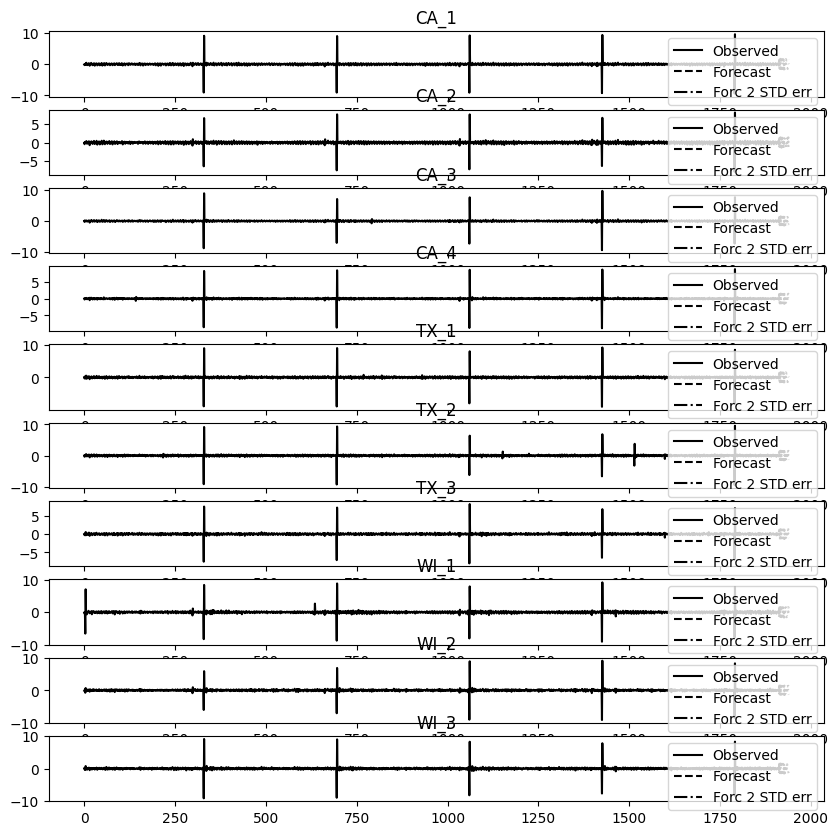

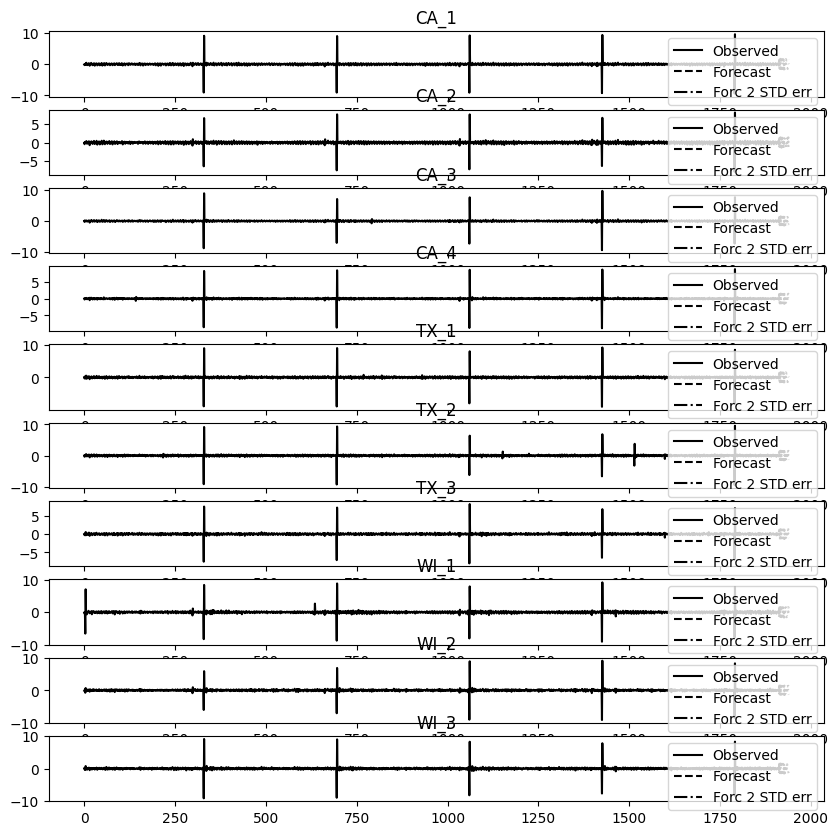

In [850]:
var_model_fit.plot_forecast(DAYS_PREDICT)

In [851]:
var_predictions

array([[-4.98526066e-01, -5.51089880e-01, -4.06299156e-01,
        -3.27901766e-01, -4.26605758e-01, -2.96453329e-01,
        -2.23873188e-01, -5.32148405e-01, -3.81663960e-01,
        -4.69166872e-01],
       [ 1.10297429e-01,  1.06695799e-01,  1.07942854e-01,
         1.54240995e-01,  1.05637359e-01,  4.11623617e-02,
         9.95853217e-02,  1.96506029e-01,  2.62690753e-01,
         2.25216957e-01],
       [ 1.33210995e-03,  7.91985512e-03, -2.11733250e-02,
        -1.53192926e-02,  7.57862285e-02,  6.33844932e-02,
         6.46864079e-03,  5.04866099e-02,  1.57501873e-02,
        -1.90158069e-03],
       [-1.90696635e-01, -1.68270316e-01, -1.68166891e-01,
        -1.66487210e-01, -2.40722121e-01, -1.31283869e-01,
        -1.57533874e-01, -1.34536838e-01, -1.13874839e-01,
        -1.51378823e-01],
       [ 2.37753445e-01,  2.84505539e-01,  1.35185331e-01,
         1.14687541e-01,  1.48032992e-01,  1.03296625e-01,
         1.25368256e-01,  2.46601484e-01,  2.10567043e-01,
         2.

In [852]:
last_actual_value = data.iloc[[-1], :]
last_actual_value = np.log(last_actual_value + 1)
last_actual_value

store_id        CA_1      CA_2       CA_3      CA_4      TX_1      TX_2  \
2016-04-24  9.905022  9.928881  10.203621  9.301344  9.473646  9.595435   

store_id        TX_3      WI_1      WI_2      WI_3  
2016-04-24  9.539976  9.606426  9.620271  9.464517

In [853]:
var_processed_predictions = pd.DataFrame(var_predictions)
var_processed_predictions.columns = data.columns
var_processed_predictions = (
    np.exp(pd.concat([last_actual_value, var_processed_predictions]).cumsum()) - 1
)
var_processed_predictions = var_processed_predictions.iloc[1:,]
var_processed_predictions

store_id          CA_1          CA_2          CA_3          CA_4  \
0         12166.166209  11821.875113  17984.506309   7889.716758   
1         13584.981087  13153.080600  20034.567760   9205.667681   
2         13603.091168  13257.672643  19614.807712   9065.702863   
3         11241.193013  11204.240400  16578.531068   7675.175694   
4         14258.557418  14891.937396  18978.400319   8608.007231   
5         20327.216893  20515.902928  25918.897906  10890.149438   
6         17775.831026  17973.586521  23941.579274   9920.575896   
7         14406.441867  13131.714081  20971.525534   8897.192236   
8         13035.248771  12118.327304  19406.345673   8541.699201   
9         14757.821022  13640.709275  21900.081129   9395.038320   
10        13905.882090  12887.397495  19873.348957   8922.249920   
11        16548.795299  15805.693938  22291.877577   9456.163138   
12        20448.390361  19996.029379  26123.183663  10579.040435   
13        21201.090244  19606.646667  27743.680839  11345.312159   
14        15131.069174  13354.581291  21893.766827   9197.617298   
15        16034.169368  14043.739284  24337.552014  10446.175708   
16        14104.866269  13227.244874  21275.739664   9169.262599   
17        13537.908292  12859.620890  19816.854147   8819.922065   
18        14815.530087  14773.409012  20158.020277   8769.636071   
19        18638.096218  19121.382767  23940.664396  10047.832133   
20        18315.302322  18537.907726  24505.354854  10247.918666   
21        14742.448028  13878.269737  21446.958125   9328.990061   
22        13044.014739  12585.227810  19817.989363   8842.189121   
23        13305.493633  13088.062436  20130.869634   8990.707015   
24        12111.644968  12173.858662  17659.503403   8179.068717   
25        14417.608563  14842.529292  19386.880459   8734.137387   
26        18457.205534  19239.293617  23654.299426  10130.475965   
27        17920.941846  18220.992234  23785.392330  10121.772258   

store_id          TX_1          TX_2          TX_3          WI_1  \
0          8492.360113  10925.883438  11114.574705   8726.881011   
1          9438.679747  11385.045025  12278.516797  10622.076297   
2         10181.884117  12130.106975  12358.206043  11172.168718   
3          8003.358149  10637.602263  10556.825512   9765.697807   
4          9280.462706  11795.297773  11966.990116  12497.140835   
5         12567.500334  15969.943626  15302.261550  17106.261967   
6         11792.536065  14439.644417  14364.319160  13495.633648   
7          9952.660274  12087.909626  13205.052875  10405.810906   
8          9532.294307  11464.576645  12718.890904   9924.243992   
9         10879.939436  12885.995524  13230.272997  11358.416702   
10         9799.492510  12537.199116  12619.813282  11422.248314   
11        11370.243246  13557.693751  13966.007950  13900.889611   
12        12968.623096  15714.678884  15818.236693  16523.914727   
13        14131.716018  16933.713413  16712.695013  15233.216650   
14        10403.705322  12735.180479  13390.063271  10290.591290   
15        11666.107971  13754.367716  14566.863633  11935.966475   
16        10607.453405  12742.883955  12774.782604  11042.032974   
17        10056.211812  12592.826384  12482.154119  11074.427646   
18        10444.273402  12934.826007  12999.444463  12703.569833   
19        12634.051428  15624.243545  15142.601145  15717.887539   
20        12906.697050  15650.631798  15264.033292  13777.394284   
21        10728.692660  13184.353294  13507.379622  10768.815814   
22         9606.545163  11533.332170  12177.939019  10383.115788   
23        10116.646214  12085.666890  12178.770007  11077.350196   
24         8931.723923  11272.272427  11279.560763  10430.782079   
25         9974.393797  12443.207109  12479.726192  12611.226358   
26        12143.549667  15110.421876  14735.139154  15637.664677   
27        12130.216408  14900.830317  14694.952759  13455.353779   

store_id          WI_2          WI_3  
0         10285

<Axes: >

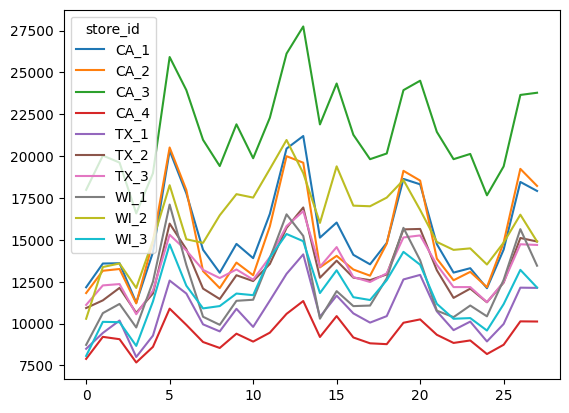

In [854]:
var_processed_predictions.plot()

In [855]:
full_var_data = pd.concat([data, var_processed_predictions])
full_var_data

store_id            CA_1          CA_2          CA_3          CA_4  \
2011-01-29  10933.160000   9101.520000  11679.830000   4561.590000   
2011-01-30   9787.060000   8417.530000  12161.460000   4681.410000   
2011-01-31   7201.380000   5320.510000   9123.860000   3637.980000   
2011-02-01   7407.740000   5550.560000  10249.780000   3708.920000   
2011-02-02   6566.120000   5229.720000   9538.650000   3841.140000   
...                  ...           ...           ...           ...   
23          13305.493633  13088.062436  20130.869634   8990.707015   
24          12111.644968  12173.858662  17659.503403   8179.068717   
25          14417.608563  14842.529292  19386.880459   8734.137387   
26          18457.205534  19239.293617  23654.299426  10130.475965   
27          17920.941846  18220.992234  23785.392330  10121.772258   

store_id            TX_1          TX_2          TX_3          WI_1  \
2011-01-29   6586.680000   9915.780000   7597.990000   6454.720000   
2011-01-30   6610.600000   9804.540000   7356.540000   5645.770000   
2011-01-31   4551.970000   6651.160000   5406.700000   3640.120000   
2011-02-01   5374.390000   6985.600000   5597.970000   2949.960000   
2011-02-02   4347.070000   6039.050000   4069.740000      2.960000   
...                  ...           ...           ...           ...   
23          10116.646214  12085.666890  12178.770007  11077.350196   
24           8931.723923  11272.272427  11279.560763  10430.782079   
25           9974.393797  12443.207109  12479.726192  12611.226358   
26          12143.549667  15110.421876  14735.139154  15637.664677   
27          12130.216408  14900.830317  14694.952759  13455.353779   

store_id            WI_2          WI_3  
2011-01-29   5451.460000   9367.880000  
2011-01-30   4636.860000   9868.800000  
2011-01-31   4621.580000   7551.650000  
2011-02-01   5754.750000   7181.530000  
2011-02-02   2679.190000   4646.310000  
...                  ...           ...  
23          14490.128567  10326.637286  
24          13526.570374   9583.393272  
25          14835.120113  11160.718558  
26          16502.141802  13207.520524  
27          14898.080345  12149.753124  

[1941 rows x 10 columns]

<Axes: >

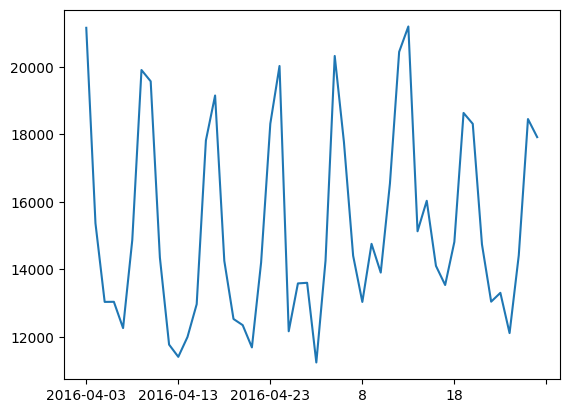

In [856]:
full_var_data.iloc[-50:,].loc[:, "CA_1"].plot()

### Post-estimation analysis


In [857]:
# Get normality test results
var_normality_test = var_model_fit.test_normality()
print(var_normality_test.summary())


normality (skew and kurtosis) test. H_0: data generated by normally-distributed process. Conclusion: reject H_0 at 5% significance level.
Test statistic Critical value p-value df
----------------------------------------
     1.043e+07          31.41   0.000 20
----------------------------------------


In [858]:
var_whiteness_test = var_model_fit.test_whiteness(nlags=21)
print(var_whiteness_test.summary())

Portmanteau-test for residual autocorrelation. H_0: residual autocorrelation up to lag 21 is zero. Conclusion: reject H_0 at 5% significance level.
Test statistic Critical value p-value  df
-----------------------------------------
         578.4          124.3   0.000 100
-----------------------------------------


### Submission generation

In [859]:
def generate_submission(submission_file, processed_prediction):
    submission_folder = "D:\OneDrive - fpts.com.vn\DucNN privates\Files\Codes\Khoa học dữ liệu\seminar_1\Evaluation\Result\Duc"

    calendar = read_data(file_name="calendar.csv")
    calendar = calendar[["d", "date"]]
    calendar.set_index("d", inplace=True)

    test_data = read_store_data(file_name="revenue_test_data_by_date_store.csv")
    test_dates = test_data["d"].unique()
    test_dates = test_dates[-DAYS_PREDICT:]

    submission = processed_prediction.copy()
    submission["d"] = test_dates
    submission.index = submission["d"]
    submission = submission.merge(
        calendar, left_index=True, right_index=True, how="left"
    )

    submission.index = submission.index.map(lambda x: x[2:]).astype(int)

    store_cols = [col for col in submission.columns if col not in ["d", "date"]]
    submission = submission[["d", "date"] + store_cols]
    submission.index.name = "id"
    submission.columns.name = None
    submission.to_csv(f"{submission_folder}/{submission_file}")


In [860]:
var_submission_file = "full_var.csv"
# generate_submission(var_submission_file, var_processed_prediction)

## VARMA


In [861]:
MA_PERIOD = 7

In [862]:
varma_ma_data = data.rolling(MA_PERIOD).mean().dropna(how="all").fillna(0)
varma_ma_data

store_id            CA_1          CA_2          CA_3         CA_4  \
2011-02-04   8341.135714   6634.535714  10685.847143  3973.905714   
2011-02-05   8690.027143   6819.577143  10977.537143  4035.235714   
2011-02-06   8804.937143   6801.108571  11306.207143  4039.904286   
2011-02-07   8876.817143   6896.335714  11708.582857  4089.502857   
2011-02-08   8939.804286   6961.420000  11856.632857  4078.712857   
...                  ...           ...           ...          ...   
2016-04-20  14439.512857  14137.242857  20360.478571  8892.961429   
2016-04-21  14395.297143  14062.300000  20079.967143  8922.551429   
2016-04-22  14571.837143  14058.935714  20215.161429  8949.080000   
2016-04-23  14642.654286  14320.334286  20547.127143  9015.092857   
2016-04-24  14767.660000  14483.237143  20547.984286  9115.675714   

store_id            TX_1          TX_2          TX_3          WI_1  \
2011-02-04   5525.195714   7766.785714   5980.785714   4171.970000   
2011-02-05   5616.621429   7752.821429   5883.680000   4371.668571   
2011-02-06   5796.071429   7799.355714   5912.144286   4140.951429   
2011-02-07   5925.260000   7974.047143   5985.557143   4162.210000   
2011-02-08   5794.424286   7947.484286   5958.202857   4251.998571   
...                  ...           ...           ...           ...   
2016-04-20  10506.617143  12848.260000  12898.662857  11448.962857   
2016-04-21  10411.105714  12711.747143  12813.502857  11490.944286   
2016-04-22  10384.132857  12759.998571  12698.227143  11503.781429   
2016-04-23  10339.678571  12731.204286  12549.614286  11482.697143   
2016-04-24  10286.085714  12486.677143  12291.981429  11457.321429   

store_id            WI_2          WI_3  
2011-02-04   4849.608571   8386.755714  
2011-02-05   4976.931429   8877.731429  
2011-02-06   4996.318571   9051.545714  
2011-02-07   5005.915714   9089.714286  
2011-02-08   4758.682857   9183.464286  
...                  ...           ...  
2016-04-20  14835.828571  11115.115714  
2016-04-21  14369.990000  10988.134286  
2016-04-22  13796.820000  10803.398571  
2016-04-23  13722.635714  10757.962857  
2016-04-24  13584.984286  10725.405714  

[1907 rows x 10 columns]

In [863]:
varma_data = np.log(varma_ma_data + 1).diff().dropna()
varma_data

store_id        CA_1      CA_2      CA_3      CA_4      TX_1      TX_2  \
2011-02-05  0.040972  0.027505  0.026928  0.015311  0.016409 -0.001799   
2011-02-06  0.013135 -0.002711  0.029498  0.001156  0.031445  0.005984   
2011-02-07  0.008130  0.013903  0.034967  0.012199  0.022040  0.022148   
2011-02-08  0.007070  0.009392  0.012564 -0.002641 -0.022325 -0.003336   
2011-02-09  0.005919  0.005245  0.016725 -0.016672  0.019615  0.010301   
...              ...       ...       ...       ...       ...       ...   
2016-04-20  0.009339 -0.002840  0.004201  0.009777 -0.003252  0.000204   
2016-04-21 -0.003067 -0.005315 -0.013872  0.003321 -0.009131 -0.010681   
2016-04-22  0.012188 -0.000239  0.006710  0.002968 -0.002594  0.003788   
2016-04-23  0.004848  0.018421  0.016287  0.007349 -0.004290 -0.002259   
2016-04-24  0.008500  0.011311  0.000042  0.011094 -0.005196 -0.019392   

store_id        TX_3      WI_1      WI_2      WI_3  
2011-02-05 -0.016367  0.046745  0.025910  0.056886  
2011-02-06  0.004825 -0.054206  0.003887  0.019387  
2011-02-07  0.012339  0.005119  0.001919  0.004207  
2011-02-08 -0.004580  0.021338 -0.050639  0.010260  
2011-02-09  0.021772  0.120725  0.066074  0.053002  
...              ...       ...       ...       ...  
2016-04-20 -0.010125  0.010435 -0.016359  0.005918  
2016-04-21 -0.006624  0.003660 -0.031901 -0.011489  
2016-04-22 -0.009036  0.001116 -0.040701 -0.016954  
2016-04-23 -0.011772 -0.001834 -0.005391 -0.004214  
2016-04-24 -0.020741 -0.002212 -0.010081 -0.003031  

[1906 rows x 10 columns]

### Stationary test

In [864]:
# ma data is not stationary
varma_ma_stationarity_results = test_stationarity(varma_ma_data, store_ids)
varma_ma_stationarity_results

ADF Statistic  ADF p-value  KPSS Statistic  KPSS p-value
Store                                                          
CA_1       -1.062871     0.729649        6.104556      0.010000
CA_2        1.056162     0.994825        3.718654      0.010000
CA_3       -1.560567     0.503366        5.800366      0.010000
CA_4       -0.795933     0.820314        6.393118      0.010000
TX_1       -1.127349     0.704043        5.931597      0.010000
TX_2       -1.635290     0.464723        3.711759      0.010000
TX_3       -0.594787     0.872156        6.280297      0.010000
WI_1       -0.703094     0.845946        6.637743      0.010000
WI_2        0.026076     0.960636        5.870067      0.010000
WI_3       -0.515784     0.888899        0.681067      0.015267

In [865]:
varma_stationarity_results = test_stationarity(varma_data, store_ids)
varma_stationarity_results

ADF Statistic   ADF p-value  KPSS Statistic  KPSS p-value
Store                                                           
CA_1      -17.101030  7.476836e-30        0.007577           0.1
CA_2      -15.633611  1.673555e-28        0.037605           0.1
CA_3      -19.751690  0.000000e+00        0.020541           0.1
CA_4      -13.922814  5.257927e-26        0.014794           0.1
TX_1      -19.773142  0.000000e+00        0.011065           0.1
TX_2      -13.005382  2.634451e-24        0.015949           0.1
TX_3      -14.017077  3.626739e-26        0.008529           0.1
WI_1      -12.528695  2.455878e-23        0.010290           0.1
WI_2      -14.505069  5.847199e-27        0.013356           0.1
WI_3      -18.243066  2.352452e-30        0.013304           0.1

### Modeling

In [866]:
varma_model = VAR(varma_data, freq="D")


In [867]:
# var_model_fit = varma_model.fit(maxlags=100, ic="aic")
varma_model_fit = varma_model.fit(31)  # aic

# varma_model_fit = varma_model.fit(maxlags=100, ic="bic")
# varma_model_fit = varma_model.fit(7)  # bic


In [868]:
varma_lag_order = varma_model_fit.k_ar
varma_lag_order

31

In [869]:
varma_predictions = varma_model_fit.forecast(
    varma_data.values[-varma_lag_order:], DAYS_PREDICT
)
varma_predictions

array([[-5.26786147e-03,  2.81172289e-04, -1.37612196e-02,
        -1.91098922e-02, -2.83232711e-02,  1.51142283e-02,
         8.14887361e-03, -3.71267461e-03, -3.07119002e-02,
        -3.26671341e-02],
       [-8.78425811e-03,  9.33177558e-03, -5.64342336e-03,
        -2.00083860e-02, -2.54294729e-02, -5.19484600e-03,
        -9.80578919e-03,  5.55100716e-03,  1.53867073e-03,
         8.20207015e-03],
       [-2.29961118e-02, -4.65678025e-03, -2.53290703e-02,
        -1.89033653e-02, -5.25167522e-03, -9.41078060e-03,
        -5.25332608e-04, -1.62229099e-02, -4.24654313e-03,
        -1.14777526e-02],
       [-7.88153715e-04,  6.27810322e-03,  2.48518928e-03,
        -5.69866360e-03, -1.01501498e-03, -1.61379795e-04,
        -4.61259680e-03, -1.33086706e-02, -1.60353903e-02,
        -1.53678979e-02],
       [ 2.75332136e-03,  1.05740129e-02,  1.07147463e-03,
         1.93978374e-03, -1.28825347e-04,  3.79973943e-03,
         9.54063270e-03,  1.53604696e-03,  2.12942585e-02,
         4.

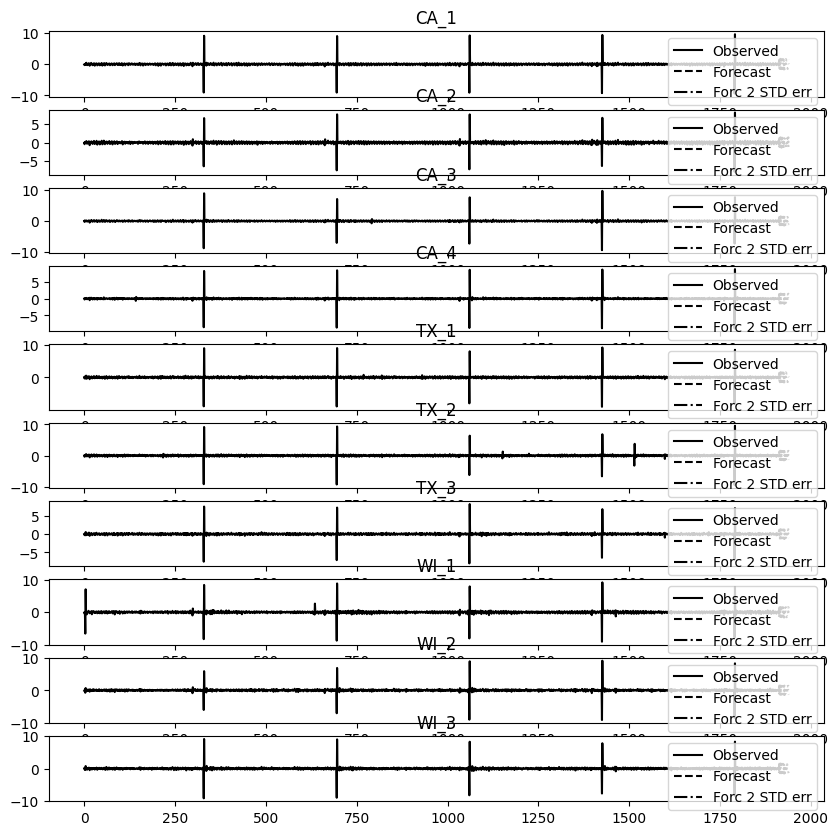

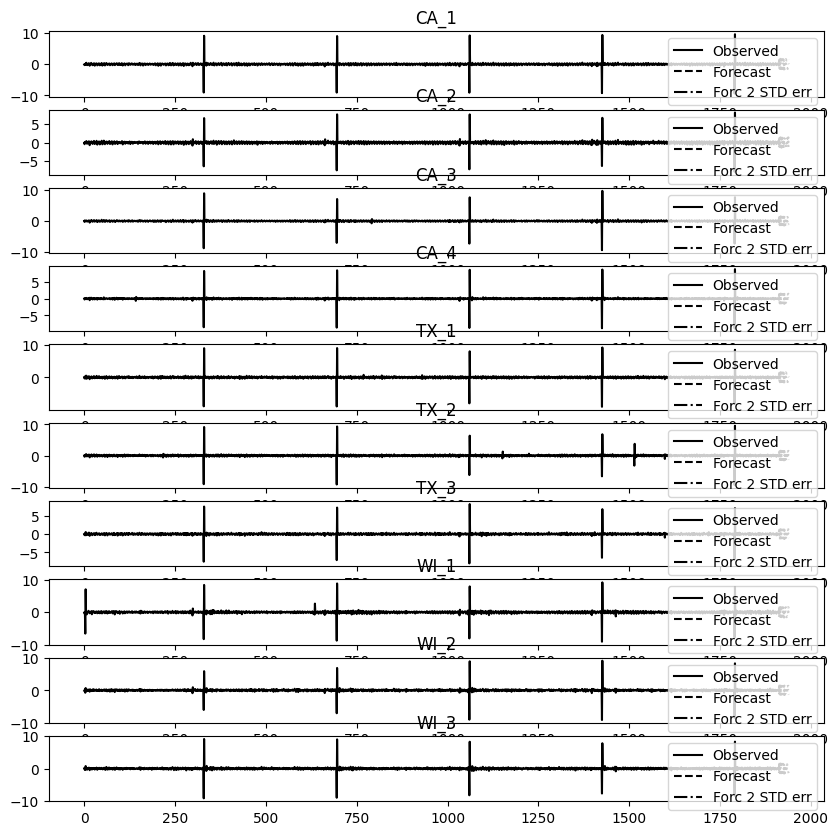

In [870]:
var_model_fit.plot_forecast(DAYS_PREDICT)

In [871]:
varma_predictions

array([[-5.26786147e-03,  2.81172289e-04, -1.37612196e-02,
        -1.91098922e-02, -2.83232711e-02,  1.51142283e-02,
         8.14887361e-03, -3.71267461e-03, -3.07119002e-02,
        -3.26671341e-02],
       [-8.78425811e-03,  9.33177558e-03, -5.64342336e-03,
        -2.00083860e-02, -2.54294729e-02, -5.19484600e-03,
        -9.80578919e-03,  5.55100716e-03,  1.53867073e-03,
         8.20207015e-03],
       [-2.29961118e-02, -4.65678025e-03, -2.53290703e-02,
        -1.89033653e-02, -5.25167522e-03, -9.41078060e-03,
        -5.25332608e-04, -1.62229099e-02, -4.24654313e-03,
        -1.14777526e-02],
       [-7.88153715e-04,  6.27810322e-03,  2.48518928e-03,
        -5.69866360e-03, -1.01501498e-03, -1.61379795e-04,
        -4.61259680e-03, -1.33086706e-02, -1.60353903e-02,
        -1.53678979e-02],
       [ 2.75332136e-03,  1.05740129e-02,  1.07147463e-03,
         1.93978374e-03, -1.28825347e-04,  3.79973943e-03,
         9.54063270e-03,  1.53604696e-03,  2.12942585e-02,
         4.

In [872]:
def process_ma_prediction(data, ma_data, ma_prediction, alternate=False):
    last_actual_ma_value = ma_data.iloc[[-1], :]
    last_actual_ma_value = np.log(last_actual_ma_value + 1)
    last_actual_ma_value
    processed_ma_prediction = pd.DataFrame(ma_prediction)
    processed_ma_prediction.columns = varma_data.columns
    processed_ma_prediction = np.exp(
        pd.concat([last_actual_ma_value, processed_ma_prediction]).cumsum()
    )
    processed_ma_prediction = processed_ma_prediction.iloc[1:,]
    full_data = data.copy()
    for i in range(0, len(processed_ma_prediction)):
        current_row = processed_ma_prediction.iloc[i, :]
        total = current_row * MA_PERIOD

        actual_prediction = total - full_data.iloc[-6:].sum()
        actual_prediction.name = i
        actual_prediction = pd.DataFrame(actual_prediction).T
        # actual_prediction
        full_data = pd.concat([full_data, actual_prediction])
    processed_prediction = full_data.iloc[-DAYS_PREDICT:,]

    if not alternate:
        return processed_ma_prediction, processed_prediction, full_data

    elif alternate:
        # Calculate the average daily pattern from historical data
        daily_patterns = data.copy()
        daily_patterns["dayofweek"] = pd.to_datetime(daily_patterns.index).day_of_week
        avg_daily_pattern = daily_patterns.groupby("dayofweek").mean()

        # Convert MA predictions to daily values while preserving weekly patterns
        full_alternate_data = data.copy()
        for i in range(0, len(processed_ma_prediction)):
            current_ma = processed_ma_prediction.iloc[i, :]

            # Get the day of week for this prediction
            prediction_date = full_alternate_data.index[-1] + pd.Timedelta(days=1)
            day_of_week = pd.Timestamp(prediction_date).day_of_week

            # Use historical pattern to distribute the MA value
            daily_ratio = avg_daily_pattern.loc[day_of_week] / avg_daily_pattern.mean()
            actual_prediction = current_ma * daily_ratio

            actual_prediction.name = prediction_date
            actual_prediction = pd.DataFrame(actual_prediction).T
            full_alternate_data = pd.concat([full_alternate_data, actual_prediction])
            alternate_processed_prediction = full_alternate_data.iloc[-DAYS_PREDICT:,]

        return (
            processed_ma_prediction,
            alternate_processed_prediction,
            full_alternate_data,
        )

In [873]:
varma_processed_ma_prediction, varma_processed_predictions, varma_full_data = (
    process_ma_prediction(data, varma_ma_data, varma_predictions)
)

<Axes: >

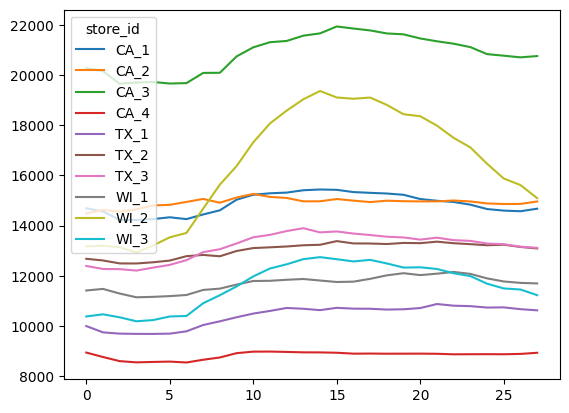

In [874]:
varma_processed_ma_prediction.plot()

<Axes: >

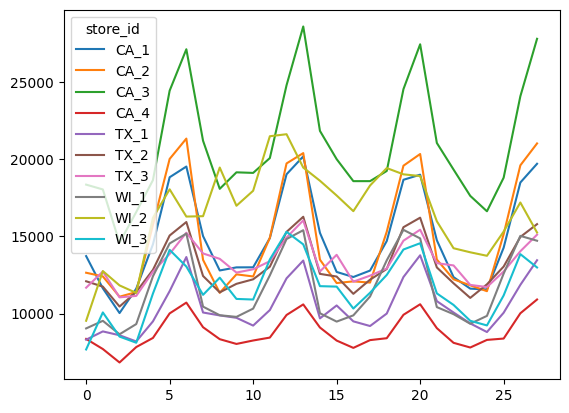

In [875]:
varma_processed_predictions.plot()

<Axes: >

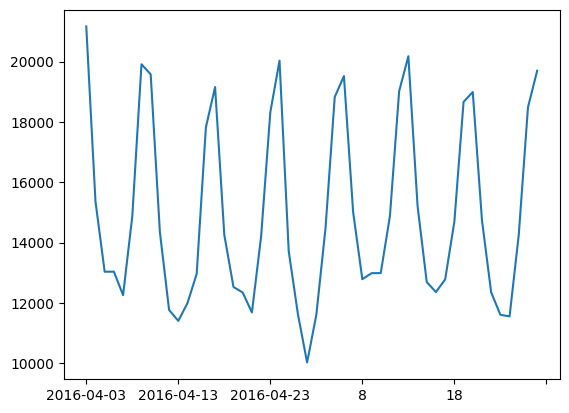

In [876]:
varma_full_data.iloc[-50:,].loc[:, "CA_1"].plot()


### Post-estimation analysis


In [879]:
# Get normality test results
varma_normality_test = varma_model_fit.test_normality()
print(varma_normality_test.summary())


normality (skew and kurtosis) test. H_0: data generated by normally-distributed process. Conclusion: reject H_0 at 5% significance level.
Test statistic Critical value p-value df
----------------------------------------
     2.629e+06          31.41   0.000 20
----------------------------------------


In [880]:
varma_whiteness_test = varma_model_fit.test_whiteness(nlags=35)
print(varma_whiteness_test.summary())

Portmanteau-test for residual autocorrelation. H_0: residual autocorrelation up to lag 35 is zero. Conclusion: reject H_0 at 5% significance level.
Test statistic Critical value p-value  df
-----------------------------------------
         1382.          447.6   0.000 400
-----------------------------------------


### Submission generation

In [881]:
varma_submission_file = "full_varma.csv"
generate_submission(varma_submission_file, varma_processed_predictions)

## VARMAX

### Preparing exog data

In [882]:
revenue


date  wm_yr_wk    weekday  wday  month  year       d event_name_1  \
0     2011-01-29     11101   Saturday     1      1  2011     d_1          NaN   
1     2011-01-30     11101     Sunday     2      1  2011     d_2          NaN   
2     2011-01-31     11101     Monday     3      1  2011     d_3          NaN   
3     2011-02-01     11101    Tuesday     4      2  2011     d_4          NaN   
4     2011-02-02     11101  Wednesday     5      2  2011     d_5          NaN   
...          ...       ...        ...   ...    ...   ...     ...          ...   
19125 2016-04-20     11612  Wednesday     5      4  2016  d_1909          NaN   
19126 2016-04-21     11612   Thursday     6      4  2016  d_1910          NaN   
19127 2016-04-22     11612     Friday     7      4  2016  d_1911          NaN   
19128 2016-04-23     11613   Saturday     1      4  2016  d_1912          NaN   
19129 2016-04-24     11613     Sunday     2      4  2016  d_1913          NaN   

      event_type_1 event_name_2 event_type_2  snap_CA  snap_TX  snap_WI  \
0              NaN          NaN          NaN        0        0        0   
1              NaN          NaN          NaN        0        0        0   
2              NaN          NaN          NaN        0        0        0   
3              NaN          NaN          NaN        1        1        0   
4              NaN          NaN          NaN        1        0        1   
...            ...          ...          ...      ...      ...      ...   
19125          NaN          NaN          NaN        0        0        0   
19126          NaN          NaN          NaN        0        0        0   
19127          NaN          NaN          NaN        0        0        0   
19128          NaN          NaN          NaN        0        0        0   
19129          NaN          NaN          NaN        0        0        0   

      store_id   revenue  
0         CA_1  10933.16  
1         CA_1   9787.06  
2         CA_1   7201.38  
3         CA_1   7407.74  
4         CA_1   6566.12  
...        ...       ...  
19125     WI_3   9341.89  
19126     WI_3   9212.23  
19127     WI_3  10959.56  
19128     WI_3  13120.79  
19129     WI_3  12892.99  

[19130 rows x 16 columns]

In [883]:
all_events = set(revenue["event_name_1"].unique())
all_events.update(set(revenue["event_name_2"].unique()))
all_events.remove(np.nan)
all_events

{'Chanukah End',
 'Christmas',
 'Cinco De Mayo',
 'ColumbusDay',
 'Easter',
 'Eid al-Fitr',
 'EidAlAdha',
 "Father's day",
 'Halloween',
 'IndependenceDay',
 'LaborDay',
 'LentStart',
 'LentWeek2',
 'MartinLutherKingDay',
 'MemorialDay',
 "Mother's day",
 'NBAFinalsEnd',
 'NBAFinalsStart',
 'NewYear',
 'OrthodoxChristmas',
 'OrthodoxEaster',
 'Pesach End',
 'PresidentsDay',
 'Purim End',
 'Ramadan starts',
 'StPatricksDay',
 'SuperBowl',
 'Thanksgiving',
 'ValentinesDay',
 'VeteransDay'}

In [884]:
def get_events(revenue, all_events):
    events_df = revenue.copy()[["date", "event_name_1", "event_name_2"]]
    for event in all_events:
        events_df[f"event_{event}"] = (
            (events_df["event_name_1"] == event) | (events_df["event_name_2"] == event)
        ).astype(int)
    events_df.set_index("date", inplace=True)
    events_df = events_df.drop(
        columns=[col for col in events_df.columns if "event_name" in col]
    )
    events_df = (events_df.groupby("date").sum() / STORE_NUM).astype(int)
    return events_df


def get_days_months(revenue):
    days_months_df = revenue.copy()[["date", "wday", "month"]]
    all_weekdays = list(range(1, 8))
    for weekday in all_weekdays:
        days_months_df[f"weekday_{weekday}"] = (
            days_months_df["wday"] == weekday
        ).astype(int)
    all_months = list(range(1, 13))
    for month in all_months:
        days_months_df[f"month_{month}"] = (days_months_df["month"] == month).astype(
            int
        )
    days_months_df = days_months_df.drop(columns=["wday", "month"])
    days_months_df = (days_months_df.groupby("date").sum() / STORE_NUM).astype(int)

    return days_months_df


def get_snap(revenue):
    snap_df = revenue.copy()[["date", "snap_CA", "snap_TX", "snap_WI"]]
    snap_df = (snap_df.groupby("date").sum() / STORE_NUM).astype(int)
    return snap_df


def get_exog(revenue, all_events):
    days_months_df = get_days_months(revenue)
    events_df = get_events(revenue, all_events)
    snap_df = get_snap(revenue)
    exog_df = days_months_df.merge(
        events_df, left_index=True, right_index=True, how="left"
    )
    exog_df = exog_df.merge(snap_df, left_index=True, right_index=True, how="left")
    return exog_df

In [885]:
exog_df = get_exog(revenue, all_events)
exog_df = exog_df.iloc[MA_PERIOD:,]
exog_df

weekday_1  weekday_2  weekday_3  weekday_4  weekday_5  weekday_6  \
date                                                                           
2011-02-05          1          0          0          0          0          0   
2011-02-06          0          1          0          0          0          0   
2011-02-07          0          0          1          0          0          0   
2011-02-08          0          0          0          1          0          0   
2011-02-09          0          0          0          0          1          0   
...               ...        ...        ...        ...        ...        ...   
2016-04-20          0          0          0          0          1          0   
2016-04-21          0          0          0          0          0          1   
2016-04-22          0          0          0          0          0          0   
2016-04-23          1          0          0          0          0          0   
2016-04-24          0          1          0          0          0          0   

            weekday_7  month_1  month_2  month_3  ...  event_MemorialDay  \
date                                              ...                      
2011-02-05          0        0        1        0  ...                  0   
2011-02-06          0        0        1        0  ...                  0   
2011-02-07          0        0        1        0  ...                  0   
2011-02-08          0        0        1        0  ...                  0   
2011-02-09          0        0        1        0  ...                  0   
...               ...      ...      ...      ...  ...                ...   
2016-04-20          0        0        0        0  ...                  0   
2016-04-21          0        0        0        0  ...                  0   
2016-04-22          1        0        0        0  ...                  0   
2016-04-23          0        0        0        0  ...                  0   
2016-04-24          0        0        0        0  ...                  0   

            event_ValentinesDay  event_PresidentsDay  event_Thanksgiving  \
date                                                                       
2011-02-05                    0                    0                   0   
2011-02-06                    0                    0                   0   
2011-02-07                    0                    0                   0   
2011-02-08                    0                    0                   0   
2011-02-09                    0                    0                   0   
...                         ...                  ...                 ...   
2016-04-20                    0                    0                   0   
2016-04-21                    0                    0                   0   
2016-04-22                    0                    0                   0   
2016-04-23                    0                    0                   0   
2016-04-24                    0                    0                   0   

            event_Halloween  event_Christmas  event_Chanukah End  snap_CA  \
date                                                                        
2011-02-05                0                0                   0        1   
2011-02-06                0                0                   0        1   
2011-02-07                0                0                   0        1   
2011-02-08                0                0                   0        1   
2011-02-09                0                0                   0        1   
...                     ...              ...                 ...      ...   
2016-04-20                0                0                   0        0   
2016-04-21                0                0                   0        0   
2016-04-22                0                0                   0        0   
2016-04-23                0                0                   0        0   
2016-04-24                0                0                   0     

In [886]:
varma_data

store_id        CA_1      CA_2      CA_3      CA_4      TX_1      TX_2  \
2011-02-05  0.040972  0.027505  0.026928  0.015311  0.016409 -0.001799   
2011-02-06  0.013135 -0.002711  0.029498  0.001156  0.031445  0.005984   
2011-02-07  0.008130  0.013903  0.034967  0.012199  0.022040  0.022148   
2011-02-08  0.007070  0.009392  0.012564 -0.002641 -0.022325 -0.003336   
2011-02-09  0.005919  0.005245  0.016725 -0.016672  0.019615  0.010301   
...              ...       ...       ...       ...       ...       ...   
2016-04-20  0.009339 -0.002840  0.004201  0.009777 -0.003252  0.000204   
2016-04-21 -0.003067 -0.005315 -0.013872  0.003321 -0.009131 -0.010681   
2016-04-22  0.012188 -0.000239  0.006710  0.002968 -0.002594  0.003788   
2016-04-23  0.004848  0.018421  0.016287  0.007349 -0.004290 -0.002259   
2016-04-24  0.008500  0.011311  0.000042  0.011094 -0.005196 -0.019392   

store_id        TX_3      WI_1      WI_2      WI_3  
2011-02-05 -0.016367  0.046745  0.025910  0.056886  
2011-02-06  0.004825 -0.054206  0.003887  0.019387  
2011-02-07  0.012339  0.005119  0.001919  0.004207  
2011-02-08 -0.004580  0.021338 -0.050639  0.010260  
2011-02-09  0.021772  0.120725  0.066074  0.053002  
...              ...       ...       ...       ...  
2016-04-20 -0.010125  0.010435 -0.016359  0.005918  
2016-04-21 -0.006624  0.003660 -0.031901 -0.011489  
2016-04-22 -0.009036  0.001116 -0.040701 -0.016954  
2016-04-23 -0.011772 -0.001834 -0.005391 -0.004214  
2016-04-24 -0.020741 -0.002212 -0.010081 -0.003031  

[1906 rows x 10 columns]

### Modeling

In [887]:
exog_df

weekday_1  weekday_2  weekday_3  weekday_4  weekday_5  weekday_6  \
date                                                                           
2011-02-05          1          0          0          0          0          0   
2011-02-06          0          1          0          0          0          0   
2011-02-07          0          0          1          0          0          0   
2011-02-08          0          0          0          1          0          0   
2011-02-09          0          0          0          0          1          0   
...               ...        ...        ...        ...        ...        ...   
2016-04-20          0          0          0          0          1          0   
2016-04-21          0          0          0          0          0          1   
2016-04-22          0          0          0          0          0          0   
2016-04-23          1          0          0          0          0          0   
2016-04-24          0          1          0          0          0          0   

            weekday_7  month_1  month_2  month_3  ...  event_MemorialDay  \
date                                              ...                      
2011-02-05          0        0        1        0  ...                  0   
2011-02-06          0        0        1        0  ...                  0   
2011-02-07          0        0        1        0  ...                  0   
2011-02-08          0        0        1        0  ...                  0   
2011-02-09          0        0        1        0  ...                  0   
...               ...      ...      ...      ...  ...                ...   
2016-04-20          0        0        0        0  ...                  0   
2016-04-21          0        0        0        0  ...                  0   
2016-04-22          1        0        0        0  ...                  0   
2016-04-23          0        0        0        0  ...                  0   
2016-04-24          0        0        0        0  ...                  0   

            event_ValentinesDay  event_PresidentsDay  event_Thanksgiving  \
date                                                                       
2011-02-05                    0                    0                   0   
2011-02-06                    0                    0                   0   
2011-02-07                    0                    0                   0   
2011-02-08                    0                    0                   0   
2011-02-09                    0                    0                   0   
...                         ...                  ...                 ...   
2016-04-20                    0                    0                   0   
2016-04-21                    0                    0                   0   
2016-04-22                    0                    0                   0   
2016-04-23                    0                    0                   0   
2016-04-24                    0                    0                   0   

            event_Halloween  event_Christmas  event_Chanukah End  snap_CA  \
date                                                                        
2011-02-05                0                0                   0        1   
2011-02-06                0                0                   0        1   
2011-02-07                0                0                   0        1   
2011-02-08                0                0                   0        1   
2011-02-09                0                0                   0        1   
...                     ...              ...                 ...      ...   
2016-04-20                0                0                   0        0   
2016-04-21                0                0                   0        0   
2016-04-22                0                0                   0        0   
2016-04-23                0                0                   0        0   
2016-04-24                0                0                   0     

In [888]:
varmax_model = VAR(varma_data, exog=exog_df, freq="D")

In [889]:
# varmax_model_fit = varmax_model.fit(maxlags=100, ic="aic")
varmax_model_fit = varmax_model.fit(29)  # aic

# varmax_model_fit = varmax_model.fit(7)  # bic


In [890]:
varmax_lag_order = varmax_model_fit.k_ar
varmax_lag_order

29

In [891]:
revenue.tail()

date  wm_yr_wk    weekday  wday  month  year       d event_name_1  \
19125 2016-04-20     11612  Wednesday     5      4  2016  d_1909          NaN   
19126 2016-04-21     11612   Thursday     6      4  2016  d_1910          NaN   
19127 2016-04-22     11612     Friday     7      4  2016  d_1911          NaN   
19128 2016-04-23     11613   Saturday     1      4  2016  d_1912          NaN   
19129 2016-04-24     11613     Sunday     2      4  2016  d_1913          NaN   

      event_type_1 event_name_2 event_type_2  snap_CA  snap_TX  snap_WI  \
19125          NaN          NaN          NaN        0        0        0   
19126          NaN          NaN          NaN        0        0        0   
19127          NaN          NaN          NaN        0        0        0   
19128          NaN          NaN          NaN        0        0        0   
19129          NaN          NaN          NaN        0        0        0   

      store_id   revenue  
19125     WI_3   9341.89  
19126     WI_3   9212.23  
19127     WI_3  10959.56  
19128     WI_3  13120.79  
19129     WI_3  12892.99

In [892]:
test_revenue = read_store_data(file_name="revenue_test_data_by_date_store.csv")
test_revenue

date  wm_yr_wk    weekday  wday  month  year       d event_name_1  \
0     2011-01-29     11101   Saturday     1      1  2011     d_1          NaN   
1     2011-01-30     11101     Sunday     2      1  2011     d_2          NaN   
2     2011-01-31     11101     Monday     3      1  2011     d_3          NaN   
3     2011-02-01     11101    Tuesday     4      2  2011     d_4          NaN   
4     2011-02-02     11101  Wednesday     5      2  2011     d_5          NaN   
...          ...       ...        ...   ...    ...   ...     ...          ...   
19405 2016-05-18     11616  Wednesday     5      5  2016  d_1937          NaN   
19406 2016-05-19     11616   Thursday     6      5  2016  d_1938          NaN   
19407 2016-05-20     11616     Friday     7      5  2016  d_1939          NaN   
19408 2016-05-21     11617   Saturday     1      5  2016  d_1940          NaN   
19409 2016-05-22     11617     Sunday     2      5  2016  d_1941          NaN   

      event_type_1 event_name_2 event_type_2  snap_CA  snap_TX  snap_WI  \
0              NaN          NaN          NaN        0        0        0   
1              NaN          NaN          NaN        0        0        0   
2              NaN          NaN          NaN        0        0        0   
3              NaN          NaN          NaN        1        1        0   
4              NaN          NaN          NaN        1        0        1   
...            ...          ...          ...      ...      ...      ...   
19405          NaN          NaN          NaN        0        0        0   
19406          NaN          NaN          NaN        0        0        0   
19407          NaN          NaN          NaN        0        0        0   
19408          NaN          NaN          NaN        0        0        0   
19409          NaN          NaN          NaN        0        0        0   

      store_id   revenue  
0         CA_1  10933.16  
1         CA_1   9787.06  
2         CA_1   7201.38  
3         CA_1   7407.74  
4         CA_1   6566.12  
...        ...       ...  
19405     WI_3   9163.29  
19406     WI_3   9660.13  
19407     WI_3  11982.37  
19408     WI_3  12370.23  
19409     WI_3  13432.85  

[19410 rows x 16 columns]

In [893]:
test_exog = get_exog(test_revenue, all_events)
test_exog = test_exog.iloc[-DAYS_PREDICT:,]

test_exog

weekday_1  weekday_2  weekday_3  weekday_4  weekday_5  weekday_6  \
date                                                                           
2016-04-25          0          0          1          0          0          0   
2016-04-26          0          0          0          1          0          0   
2016-04-27          0          0          0          0          1          0   
2016-04-28          0          0          0          0          0          1   
2016-04-29          0          0          0          0          0          0   
2016-04-30          1          0          0          0          0          0   
2016-05-01          0          1          0          0          0          0   
2016-05-02          0          0          1          0          0          0   
2016-05-03          0          0          0          1          0          0   
2016-05-04          0          0          0          0          1          0   
2016-05-05          0          0          0          0          0          1   
2016-05-06          0          0          0          0          0          0   
2016-05-07          1          0          0          0          0          0   
2016-05-08          0          1          0          0          0          0   
2016-05-09          0          0          1          0          0          0   
2016-05-10          0          0          0          1          0          0   
2016-05-11          0          0          0          0          1          0   
2016-05-12          0          0          0          0          0          1   
2016-05-13          0          0          0          0          0          0   
2016-05-14          1          0          0          0          0          0   
2016-05-15          0          1          0          0          0          0   
2016-05-16          0          0          1          0          0          0   
2016-05-17          0          0          0          1          0          0   
2016-05-18          0          0          0          0          1          0   
2016-05-19          0          0          0          0          0          1   
2016-05-20          0          0          0          0          0          0   
2016-05-21          1          0          0          0          0          0   
2016-05-22          0          1          0          0          0          0   

            weekday_7  month_1  month_2  month_3  ...  event_MemorialDay  \
date                                              ...                      
2016-04-25          0        0        0        0  ...                  0   
2016-04-26          0        0        0        0  ...                  0   
2016-04-27          0        0        0        0  ...                  0   
2016-04-28          0        0        0        0  ...                  0   
2016-04-29          1        0        0        0  ...                  0   
2016-04-30          0        0        0        0  ...                  0   
2016-05-01          0        0        0        0  ...                  0   
2016-05-02          0        0        0        0  ...                  0   
2016-05-03          0        0        0        0  ...                  0   
2016-05-04          0        0        0        0  ...                  0   
2016-05-05          0        0        0        0  ...                  0   
2016-05-06          1        0        0        0  ...                  0   
2016-05-07          0        0        0        0  ...                  0   
2016-05-08          0        0        0        0  ...                  0   
2016-05-09          0        0        0        0  ...                  0   
2016-05-10          0        0        0        0  ...                  0   
2016-05-11          0        0        0        0  ...                  0   
2016-05-12          0        0        0        0  ...                  0   
2016-05-13          1        0        0        0  ...                  0   
2016-05-14     

In [894]:
test_exog

weekday_1  weekday_2  weekday_3  weekday_4  weekday_5  weekday_6  \
date                                                                           
2016-04-25          0          0          1          0          0          0   
2016-04-26          0          0          0          1          0          0   
2016-04-27          0          0          0          0          1          0   
2016-04-28          0          0          0          0          0          1   
2016-04-29          0          0          0          0          0          0   
2016-04-30          1          0          0          0          0          0   
2016-05-01          0          1          0          0          0          0   
2016-05-02          0          0          1          0          0          0   
2016-05-03          0          0          0          1          0          0   
2016-05-04          0          0          0          0          1          0   
2016-05-05          0          0          0          0          0          1   
2016-05-06          0          0          0          0          0          0   
2016-05-07          1          0          0          0          0          0   
2016-05-08          0          1          0          0          0          0   
2016-05-09          0          0          1          0          0          0   
2016-05-10          0          0          0          1          0          0   
2016-05-11          0          0          0          0          1          0   
2016-05-12          0          0          0          0          0          1   
2016-05-13          0          0          0          0          0          0   
2016-05-14          1          0          0          0          0          0   
2016-05-15          0          1          0          0          0          0   
2016-05-16          0          0          1          0          0          0   
2016-05-17          0          0          0          1          0          0   
2016-05-18          0          0          0          0          1          0   
2016-05-19          0          0          0          0          0          1   
2016-05-20          0          0          0          0          0          0   
2016-05-21          1          0          0          0          0          0   
2016-05-22          0          1          0          0          0          0   

            weekday_7  month_1  month_2  month_3  ...  event_MemorialDay  \
date                                              ...                      
2016-04-25          0        0        0        0  ...                  0   
2016-04-26          0        0        0        0  ...                  0   
2016-04-27          0        0        0        0  ...                  0   
2016-04-28          0        0        0        0  ...                  0   
2016-04-29          1        0        0        0  ...                  0   
2016-04-30          0        0        0        0  ...                  0   
2016-05-01          0        0        0        0  ...                  0   
2016-05-02          0        0        0        0  ...                  0   
2016-05-03          0        0        0        0  ...                  0   
2016-05-04          0        0        0        0  ...                  0   
2016-05-05          0        0        0        0  ...                  0   
2016-05-06          1        0        0        0  ...                  0   
2016-05-07          0        0        0        0  ...                  0   
2016-05-08          0        0        0        0  ...                  0   
2016-05-09          0        0        0        0  ...                  0   
2016-05-10          0        0        0        0  ...                  0   
2016-05-11          0        0        0        0  ...                  0   
2016-05-12          0        0        0        0  ...                  0   
2016-05-13          1        0        0        0  ...                  0   
2016-05-14     

In [895]:
varmax_predictions = varmax_model_fit.forecast(
    varma_data.values[-varmax_lag_order:], DAYS_PREDICT, exog_future=test_exog
)
varmax_predictions

array([[ 0.00554442,  0.01310653, -0.00252694, -0.00776889, -0.01942852,
         0.0216126 ,  0.01002218,  0.00852489, -0.01214286, -0.02178861],
       [-0.00347888,  0.00627054, -0.00526587, -0.00964646, -0.02120482,
        -0.00819949, -0.01190971,  0.00791358, -0.00231294, -0.0015514 ],
       [-0.01363614, -0.00702158, -0.02312854, -0.00656643, -0.0131844 ,
        -0.01794527, -0.00481437, -0.01147511, -0.02084682, -0.03065141],
       [ 0.00079451,  0.00522475, -0.00065677,  0.0002514 , -0.00379856,
        -0.00323326, -0.00443148, -0.00199345, -0.01985112, -0.02430647],
       [ 0.00473231,  0.00974604, -0.00329007,  0.00792946, -0.0027191 ,
         0.00064772,  0.00885672,  0.01070747,  0.01349228, -0.00490413],
       [ 0.00523788, -0.00196355, -0.0080318 , -0.00562302, -0.00633902,
        -0.00157965,  0.00090124, -0.00320827,  0.00411122, -0.00547299],
       [ 0.02085513,  0.00438812,  0.0185592 , -0.00451036,  0.00545218,
         0.02283741,  0.03444325,  0.02322516

<Axes: >

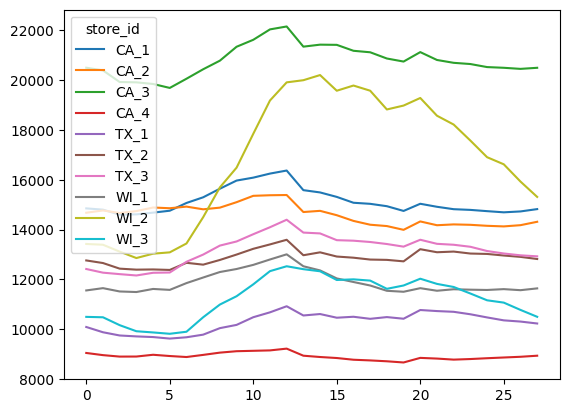

In [896]:
varmax_processed_ma_predictions, varmax_processed_predictions, varmax_full_data = (
    process_ma_prediction(data, varma_ma_data, varmax_predictions)
)
varmax_processed_ma_predictions.plot()

<Axes: >

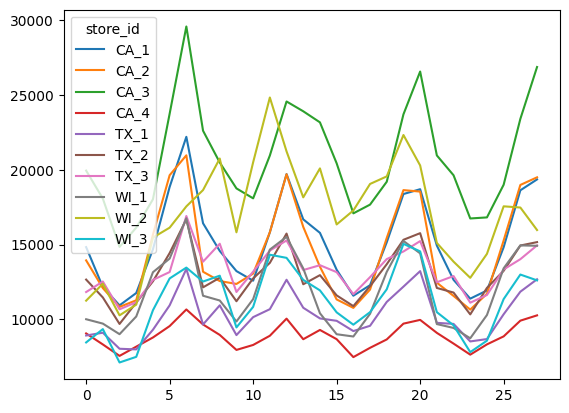

In [897]:
varmax_processed_predictions.plot()

### Post-estimation analysis


In [898]:
# Get normality test results
varmax_normality_test = varmax_model_fit.test_normality()
print(varmax_normality_test.summary())


normality (skew and kurtosis) test. H_0: data generated by normally-distributed process. Conclusion: reject H_0 at 5% significance level.
Test statistic Critical value p-value df
----------------------------------------
     9.022e+05          31.41   0.000 20
----------------------------------------


In [899]:
varmax_whiteness_test = varmax_model_fit.test_whiteness(nlags=35)
print(varmax_whiteness_test.summary())

Portmanteau-test for residual autocorrelation. H_0: residual autocorrelation up to lag 35 is zero. Conclusion: reject H_0 at 5% significance level.
Test statistic Critical value p-value  df
-----------------------------------------
         2081.          658.1   0.000 600
-----------------------------------------


### Submission generation

In [900]:
varmax_submission_file = "full_varmax.csv"
generate_submission(varmax_submission_file, varmax_processed_predictions)

# Stationary test summary

In [901]:
var_stationarity_results

ADF Statistic   ADF p-value  KPSS Statistic  KPSS p-value
Store                                                           
CA_1      -16.549476  1.950987e-29        0.028091           0.1
CA_2      -15.689897  1.438130e-28        0.044572           0.1
CA_3      -16.166057  4.414535e-29        0.028039           0.1
CA_4      -15.254667  4.954493e-28        0.046731           0.1
TX_1      -16.624575  1.686548e-29        0.031244           0.1
TX_2      -16.399068  2.648983e-29        0.031658           0.1
TX_3      -16.539746  1.988839e-29        0.030256           0.1
WI_1      -15.362660  3.595233e-28        0.041308           0.1
WI_2      -18.946311  0.000000e+00        0.195799           0.1
WI_3      -18.120011  2.523168e-30        0.043043           0.1

In [902]:
data_stationary_result = data_stationarity_results["ADF p-value"]
data_stationary_result.name = "Original Data"
var_stationary_result = var_stationarity_results["ADF p-value"]
var_stationary_result.name = "Log-Diff"
ma_stationary_result = varma_ma_stationarity_results["ADF p-value"]
ma_stationary_result.name = "Moving Average"
log_returns_stationary_result = varma_stationarity_results["ADF p-value"]
log_returns_stationary_result.name = "MA Log-Diff"


In [903]:
# Merge all the ADF test results into a DataFrame
stationarity_comparison = pd.concat(
    [
        data_stationary_result,
        var_stationary_result,
        ma_stationary_result,
        log_returns_stationary_result,
    ],
    axis=1,
)

# The DataFrame will have:
# - Index: store IDs
# - Columns: ADF p-values for original, MA, and log returns data
stationarity_comparison

Original Data      Log-Diff  Moving Average   MA Log-Diff
Store                                                           
CA_1        0.546875  1.950987e-29        0.729649  7.476836e-30
CA_2        0.977805  1.438130e-28        0.994825  1.673555e-28
CA_3        0.401884  4.414535e-29        0.503366  0.000000e+00
CA_4        0.749895  4.954493e-28        0.820314  5.257927e-26
TX_1        0.520395  1.686548e-29        0.704043  0.000000e+00
TX_2        0.261512  2.648983e-29        0.464723  2.634451e-24
TX_3        0.756591  1.988839e-29        0.872156  3.626739e-26
WI_1        0.768734  3.595233e-28        0.845946  2.455878e-23
WI_2        0.856300  0.000000e+00        0.960636  5.847199e-27
WI_3        0.289619  2.523168e-30        0.888899  2.352452e-30

In [904]:
import plotly.express as px

# Melt the DataFrame to get it into the right format for plotting
stationarity_melted = stationarity_comparison.melt(
    value_name="p-value", var_name="Transformation"
)

# Create boxplot
fig = px.box(
    stationarity_melted,
    x="Transformation",
    y="p-value",
    title="So sánh kết quả kiểm định ADF cho các biến đổi dữ liệu",
    labels={
        "Transformation": "Phương pháp biến đổi",
        "p-value": "p-value của kiểm định ADF",
    },
)

# Add horizontal line at p=0.05
fig.add_hline(
    y=0.05,
    line_dash="dash",
    line_color="red",
    annotation_text="p=0.05",
    annotation_position="right",
)

# Update layout
fig.update_layout(
    showlegend=False, title_x=0.5, yaxis_title="p-value của kiểm định ADF"
)

fig.show()

# Prediction summary

## CA_3

In [905]:
output_directory = r"D:\OneDrive - fpts.com.vn\DucNN privates\Files\Codes\Khoa học dữ liệu\seminar_1\Evaluation\Result\Duc"
var_processed_predictions = pd.read_csv(
    f"{output_directory}/full_var.csv", index_col="date", parse_dates=True
)
var_processed_predictions.drop(["d", "id"], axis=1, inplace=True)
var_processed_predictions

CA_1          CA_2          CA_3          CA_4  \
date                                                                 
2016-04-25  12166.166209  11821.875113  17984.506309   7889.716758   
2016-04-26  13584.981087  13153.080600  20034.567760   9205.667681   
2016-04-27  13603.091168  13257.672643  19614.807712   9065.702863   
2016-04-28  11241.193013  11204.240400  16578.531068   7675.175694   
2016-04-29  14258.557418  14891.937396  18978.400319   8608.007231   
2016-04-30  20327.216893  20515.902928  25918.897906  10890.149438   
2016-05-01  17775.831026  17973.586521  23941.579274   9920.575896   
2016-05-02  14406.441867  13131.714081  20971.525534   8897.192236   
2016-05-03  13035.248771  12118.327304  19406.345673   8541.699201   
2016-05-04  14757.821022  13640.709275  21900.081129   9395.038320   
2016-05-05  13905.882090  12887.397495  19873.348957   8922.249920   
2016-05-06  16548.795299  15805.693938  22291.877577   9456.163138   
2016-05-07  20448.390361  19996.029379  26123.183663  10579.040435   
2016-05-08  21201.090244  19606.646667  27743.680839  11345.312159   
2016-05-09  15131.069174  13354.581291  21893.766827   9197.617298   
2016-05-10  16034.169368  14043.739284  24337.552014  10446.175708   
2016-05-11  14104.866269  13227.244874  21275.739664   9169.262599   
2016-05-12  13537.908292  12859.620890  19816.854147   8819.922065   
2016-05-13  14815.530087  14773.409012  20158.020277   8769.636071   
2016-05-14  18638.096218  19121.382767  23940.664396  10047.832133   
2016-05-15  18315.302322  18537.907726  24505.354854  10247.918666   
2016-05-16  14742.448028  13878.269737  21446.958125   9328.990061   
2016-05-17  13044.014739  12585.227810  19817.989363   8842.189121   
2016-05-18  13305.493633  13088.062436  20130.869634   8990.707015   
2016-05-19  12111.644968  12173.858662  17659.503403   8179.068717   
2016-05-20  14417.608563  14842.529292  19386.880459   8734.137387   
2016-05-21  18457.205534  19239.293617  23654.299426  10130.475965   
2016-05-22  17920.941846  18220.992234  23785.392330  10121.772258   

                    TX_1          TX_2          TX_3          WI_1  \
date                                                                 
2016-04-25   8492.360113  10925.883438  11114.574705   8726.881011   
2016-04-26   9438.679747  11385.045025  12278.516797  10622.076297   
2016-04-27  10181.884117  12130.106975  12358.206043  11172.168718   
2016-04-28   8003.358149  10637.602263  10556.825512   9765.697807   
2016-04-29   9280.462706  11795.297773  11966.990116  12497.140835   
2016-04-30  12567.500334  15969.943626  15302.261550  17106.261967   
2016-05-01  11792.536065  14439.644417  14364.319160  13495.633648   
2016-05-02   9952.660274  12087.909626  13205.052875  10405.810906   
2016-05-03   9532.294307  11464.576645  12718.890904   9924.243992   
2016-05-04  10879.939436  12885.995524  13230.272997  11358.416702   
2016-05-05   9799.492510  12537.199116  12619.813282  11422.248314   
2016-05-06  11370.243246  13557.693751  13966.007950  13900.889611   
2016-05-07  12968.623096  15714.678884  15818.236693  16523.914727   
2016-05-08  14131.716018  16933.713413  16712.695013  15233.216650   
2016-05-09  10403.705322  12735.180479  13390.063271  10290.591290   
2016-05-10  11666.107971  13754.367716  14566.863633  11935.966475   
2016-05-11  10607.453405  12742.883955  12774.782604  11042.032974   
2016-05-12  10056.211812  12592.826384  12482.154119  11074.427646   
2016-05-13  10444.273402  12934.826007  12999.444463  12703.569833   
2016-05-14  12634.051428  15624.243545  15142.601145  15717.887539   
2016-05-15  12906.697050  15650.631798  15264.033292  13777.394284   
2016-05-16  10728.692660  13184.353294  13507.379622  10768.815814   
2016-05-17   9606.545163  11533.332170  12177.939019  10383.115788   
2016-05-18  10116.646214  12085.666890  12178.770007  11077.350196   
2016-05-19   8931.723923  11272.272427  11279.560763  10430.782079   
2016-05-20   9974.393797  124

In [906]:
var_predictions_CA3 = var_processed_predictions["CA_3"]
var_predictions_CA3.name = "VAR"
var_predictions_CA3

date
2016-04-25    17984.506309
2016-04-26    20034.567760
2016-04-27    19614.807712
2016-04-28    16578.531068
2016-04-29    18978.400319
2016-04-30    25918.897906
2016-05-01    23941.579274
2016-05-02    20971.525534
2016-05-03    19406.345673
2016-05-04    21900.081129
2016-05-05    19873.348957
2016-05-06    22291.877577
2016-05-07    26123.183663
2016-05-08    27743.680839
2016-05-09    21893.766827
2016-05-10    24337.552014
2016-05-11    21275.739664
2016-05-12    19816.854147
2016-05-13    20158.020277
2016-05-14    23940.664396
2016-05-15    24505.354854
2016-05-16    21446.958125
2016-05-17    19817.989363
2016-05-18    20130.869634
2016-05-19    17659.503403
2016-05-20    19386.880459
2016-05-21    23654.299426
2016-05-22    23785.392330
Name: VAR, dtype: float64

In [907]:
varma_processed_predictions = pd.read_csv(
    f"{output_directory}/full_varma.csv", index_col="date", parse_dates=True
)
varma_processed_predictions.drop(["d", "id"], axis=1, inplace=True)
varma_processed_predictions

CA_1          CA_2          CA_3          CA_4  \
date                                                                 
2016-04-25  13718.137125  12640.971971  18348.063991   8355.207846   
2016-04-26  11631.355275  12403.641239  18034.293079   7700.408498   
2016-04-27  10030.418995  11088.618247  14584.886427   6829.104191   
2016-04-28  11609.504563  11388.249606  16572.773061   7827.386129   
2016-04-29  14479.529167  15744.100166  18638.837312   8418.031459   
2016-04-30  18824.543477  20010.620806  24432.022220  10007.426464   
2016-05-01  19518.032624  21328.735055  27114.139900  10706.325886   
2016-05-02  15014.457876  13476.912163  21189.642186   9113.304539   
2016-05-03  12788.636914  11339.430343  18075.413039   8337.738499   
2016-05-04  12988.317110  12536.313287  19143.637066   8029.969329   
2016-05-05  12992.344576  12400.656794  19106.608434   8252.654673   
2016-05-06  14884.655998  14907.179120  20065.867550   8441.075158   
2016-05-07  19016.826688  19719.589122  24784.029312   9904.574548   
2016-05-08  20175.725984  20388.511592  28589.333020  10589.188265   
2016-05-09  15222.010957  13487.795037  21827.314625   9093.765976   
2016-05-10  12692.308304  11973.785869  19997.559367   8248.280908   
2016-05-11  12364.011747  12081.798152  18572.330951   7774.603046   
2016-05-12  12780.419425  12002.961238  18573.168796   8277.201690   
2016-05-13  14694.457347  15297.527705  19231.408632   8400.713671   
2016-05-14  18660.889290  19572.364844  24530.147761   9916.305235   
2016-05-15  18990.936307  20329.998071  27435.507418  10598.704415   
2016-05-16  14742.889415  13495.728954  21045.058475   9051.185634   
2016-05-17  12356.618066  12215.367854  19323.330424   8102.265799   
2016-05-18  11610.701624  11823.855030  17618.767108   7798.465122   
2016-05-19  11558.326145  11446.261897  16620.971407   8291.165660   
2016-05-20  14263.186115  15137.754409  18795.925354   8378.197351   
2016-05-21  18483.618427  19596.202390  24069.428293  10015.190743   
2016-05-22  19697.220713  21014.571213  27791.384596  10907.203931   

                    TX_1          TX_2          TX_3          WI_1  \
date                                                                 
2016-04-25   8305.305134  12088.276106  11672.302507   9034.414976   
2016-04-26   8840.992810  11741.618952  12721.006521   9527.130074   
2016-04-27   8592.719424  10452.025024  11047.411364   8656.141718   
2016-04-28   8191.132048  11395.617151  11140.289275   9316.140816   
2016-04-29   9491.144301  12827.466844  12709.222436  12412.490626   
2016-04-30  11448.649127  15051.212025  13859.496385  14537.836331   
2016-05-01  13657.589464  15924.841837  15233.307784  15174.365057   
2016-05-02  10065.506830  12431.337330  13889.365715  10445.209474   
2016-05-03   9876.054578  11369.642593  13541.141714   9888.701342   
2016-05-04   9722.259641  11922.162873  12651.119010   9781.809384   
2016-05-05   9218.159036  12214.982072  12864.169947  10317.968556   
2016-05-06  10223.628389  13032.515597  13385.768676  12468.787264   
2016-05-07  12278.207844  15284.472765  14917.020996  14821.790416   
2016-05-08  13430.432377  16265.601786  16030.192488  15394.953991   
2016-05-09   9684.600886  12567.212811  12722.303644  10017.440998   
2016-05-10  10521.374353  12394.208916  13801.598037   9476.633615   
2016-05-11   9491.918025  11275.653028  12062.591886   9880.211501   
2016-05-12   9189.680801  12190.853845  12451.804035  11102.022488   
2016-05-13   9997.691896  12884.741733  12916.285730  13444.291900   
2016-05-14  12362.347675  15589.957870  14716.005037  15418.927044   
2016-05-15  13771.874174  16206.531908  15427.873473  14864.488640   
2016-05-16  10800.627780  12984.417213  13261.478210  10414.947570   
2016-05-17  10065.317392  11959.340324  13113.528345   9957.986016   
2016-05-18   9357.569025  11011.490533  11852.025760   9337.331632   
2016-05-19   8800.794270  11889.830614  11713.560562   9846.929008   
2016-05-20  10050.339279  130

In [908]:
varma_predictions_CA3 = varma_processed_predictions["CA_3"]
varma_predictions_CA3.name = "VARMA"
varma_predictions_CA3


date
2016-04-25    18348.063991
2016-04-26    18034.293079
2016-04-27    14584.886427
2016-04-28    16572.773061
2016-04-29    18638.837312
2016-04-30    24432.022220
2016-05-01    27114.139900
2016-05-02    21189.642186
2016-05-03    18075.413039
2016-05-04    19143.637066
2016-05-05    19106.608434
2016-05-06    20065.867550
2016-05-07    24784.029312
2016-05-08    28589.333020
2016-05-09    21827.314625
2016-05-10    19997.559367
2016-05-11    18572.330951
2016-05-12    18573.168796
2016-05-13    19231.408632
2016-05-14    24530.147761
2016-05-15    27435.507418
2016-05-16    21045.058475
2016-05-17    19323.330424
2016-05-18    17618.767108
2016-05-19    16620.971407
2016-05-20    18795.925354
2016-05-21    24069.428293
2016-05-22    27791.384596
Name: VARMA, dtype: float64

In [909]:
varmax_processed_predictions = pd.read_csv(
    f"{output_directory}/full_varmax.csv", index_col="date", parse_dates=True
)
varmax_processed_predictions.drop(["d", "id"], axis=1, inplace=True)
varmax_processed_predictions

CA_1          CA_2          CA_3          CA_4  \
date                                                                 
2016-04-25  14836.077170  13950.073314  19950.936158   9069.295611   
2016-04-26  12169.729930  12098.979802  18079.149678   8332.755014   
2016-04-27  10944.810220  10840.917130  14850.230594   7567.815780   
2016-04-28  11769.213964  11284.265218  16138.944458   8185.245518   
2016-04-29  14690.212657  15664.729647  18033.221038   8797.899573   
2016-04-30  18857.574605  19641.721994  23750.271318   9559.324148   
2016-05-01  22206.620617  20970.721151  29581.154150  10670.628952   
2016-05-02  16429.784636  13190.423830  22614.930375   9667.115388   
2016-05-03  14581.639797  12569.112536  20491.647110   8969.564652   
2016-05-04  13234.390165  12375.609371  18760.659268   7966.796057   
2016-05-05  12593.044363  13068.888941  18095.604490   8298.551127   
2016-05-06  15825.830509  15827.660894  20956.833727   8912.609618   
2016-05-07  19716.389152  19706.286987  24569.261240  10057.373118   
2016-05-08  16693.376089  16188.815216  23914.175518   8681.835875   
2016-05-09  15789.686531  13524.880109  23173.873429   9301.164840   
2016-05-10  13326.252301  11341.058557  20436.994575   8684.668575   
2016-05-11  11589.432940  10776.200380  17092.678692   7485.619865   
2016-05-12  12292.239106  11998.452682  17677.099190   8107.308779   
2016-05-13  15160.043631  15449.218129  19205.164783   8667.248742   
2016-05-14  18384.188510  18646.503979  23710.772509   9722.716545   
2016-05-15  18707.215055  18546.349940  26569.772112   9973.775507   
2016-05-16  14941.609458  12459.981342  20964.020914   9106.296612   
2016-05-17  12650.571175  11574.932765  19638.188062   8389.573036   
2016-05-18  11392.639715  10660.881107  16750.725622   7650.276299   
2016-05-19  11938.616953  11718.753542  16822.397472   8337.101515   
2016-05-20  14830.960513  15281.021191  19005.479257   8871.517153   
2016-05-21  18633.556826  18991.303961  23405.573361   9922.265517   
2016-05-22  19361.006534  19500.606303  26872.513214  10276.164438   

                    TX_1          TX_2          TX_3          WI_1  \
date                                                                 
2016-04-25   8930.703181  12666.851352  11834.973163  10018.339722   
2016-04-26   9116.775760  11472.027019  12538.525819   9725.018198   
2016-04-27   8044.544255   9703.294351  10680.024684   9018.924112   
2016-04-28   8001.290746  11128.831343  11157.482088  10200.863748   
2016-04-29   9315.292424  12550.770068  12646.937577  13158.570232   
2016-04-30  10945.115905  14438.464493  13171.041131  14071.684574   
2016-05-01  13379.528945  16698.317036  16914.970723  16763.454912   
2016-05-02   9667.193416  12148.372679  13863.222466  11587.421161   
2016-05-03  10945.533431  12790.943790  15062.851369  11269.331912   
2016-05-04   8958.083112  11220.696252  11837.659726   9865.873423   
2016-05-05  10157.405189  12746.390826  13197.367773  11361.267523   
2016-05-06  10688.822824  13784.333427  14606.419738  14671.727136   
2016-05-07  12655.945639  15741.232435  15280.793537  15521.669514   
2016-05-08  10784.835095  12353.971174  13304.406357  13412.622912   
2016-05-09  10071.737001  12963.971601  13628.295353  10416.693082   
2016-05-10   9912.218894  11610.815240  13164.860035   9015.499383   
2016-05-11   9226.866590  10894.295872  11690.424597   8863.514341   
2016-05-12   9578.877503  12224.436085  12830.996289  10379.968784   
2016-05-13  11174.436191  13693.931547  14037.711996  13184.896585   
2016-05-14  12195.884628  15325.901976  14544.936146  15248.908031   
2016-05-15  13232.428863  15768.861880  15238.863952  14419.368172   
2016-05-16   9775.714245  12108.442920  12485.085198   9693.854100   
2016-05-17   9705.884428  11800.190249  12903.246785   9435.588582   
2016-05-18   8533.963513  10341.809680  11122.942604   8744.378391   
2016-05-19   8692.418598  12112.116747  11638.625837  10299.204351   
2016-05-20  10351.077504  132

In [910]:
varmax_predictions_CA3 = varmax_processed_predictions["CA_3"]
varmax_predictions_CA3.name = "VARMAX"
varmax_predictions_CA3

date
2016-04-25    19950.936158
2016-04-26    18079.149678
2016-04-27    14850.230594
2016-04-28    16138.944458
2016-04-29    18033.221038
2016-04-30    23750.271318
2016-05-01    29581.154150
2016-05-02    22614.930375
2016-05-03    20491.647110
2016-05-04    18760.659268
2016-05-05    18095.604490
2016-05-06    20956.833727
2016-05-07    24569.261240
2016-05-08    23914.175518
2016-05-09    23173.873429
2016-05-10    20436.994575
2016-05-11    17092.678692
2016-05-12    17677.099190
2016-05-13    19205.164783
2016-05-14    23710.772509
2016-05-15    26569.772112
2016-05-16    20964.020914
2016-05-17    19638.188062
2016-05-18    16750.725622
2016-05-19    16822.397472
2016-05-20    19005.479257
2016-05-21    23405.573361
2016-05-22    26872.513214
Name: VARMAX, dtype: float64

In [911]:
actual_data = read_store_data("revenue_test_data_by_date_store.csv")

actual_data = actual_data.pivot(index="date", columns="store_id", values="revenue")
actual_data = actual_data.iloc[-DAYS_PREDICT:,]
actual_data

store_id        CA_1      CA_2      CA_3      CA_4      TX_1      TX_2  \
date                                                                     
2016-04-25  13887.08  12858.75  21662.51   9353.61   9354.89  12968.33   
2016-04-26  11996.21  11855.37  17924.10   8345.31   8934.54  11595.40   
2016-04-27  12037.84  11445.13  16858.21   8180.92   8942.52  10495.51   
2016-04-28  11842.57  12615.20  16662.98   7523.25   7901.84  11490.03   
2016-04-29  15531.11  13850.23  19288.78   8411.11  11775.60  12775.54   
2016-04-30  18653.94  20725.21  24333.26   9719.27  12424.21  15266.48   
2016-05-01  20957.14  20896.89  26670.55  11039.87  13884.16  16405.93   
2016-05-02  15497.53  14959.28  22582.73  10336.66   9503.97  12288.21   
2016-05-03  14949.03  13332.37  20335.42   9478.27  10288.27  13094.97   
2016-05-04  13300.04  13149.59  20043.67   8395.94   9370.00  11202.27   
2016-05-05  12317.36  12843.16  19542.70   8307.35   9945.57  11814.86   
2016-05-06  15798.44  14764.95  19599.12   8370.76  10470.88  13586.64   
2016-05-07  19753.75  22133.26  24941.17  10106.37  13159.87  15389.28   
2016-05-08  17005.95  17591.66  22905.84   8705.03  10281.61  13660.00   
2016-05-09  15494.36  13434.28  23045.47  10131.62  11201.79  13729.48   
2016-05-10  14097.24  13432.33  20180.77   9253.93  10024.49  12265.75   
2016-05-11  12747.16  12166.92  20375.92   8578.03  10892.27  12125.64   
2016-05-12  12972.42  12371.14  17510.73   8668.16  10570.04  12952.73   
2016-05-13  15535.51  15537.74  19829.86   8745.19  11544.88  13981.54   
2016-05-14  20314.35  21715.05  24562.27  10328.71  11840.00  14289.23   
2016-05-15  21730.28  22391.85  27210.84  11039.51  16408.23  19045.34   
2016-05-16  15236.62  14045.24  20218.10   9646.05  11550.32  13438.51   
2016-05-17  12447.15  12796.76  18372.20   8840.67  10574.30  12631.41   
2016-05-18  12920.62  12766.25  17780.83   8116.41   9851.97  11121.03   
2016-05-19  13259.90  13432.94  18635.35   8367.57   8403.09  10474.33   
2016-05-20  13999.65  15545.28  18219.23   8960.17  11296.88  13832.01   
2016-05-21  18637.70  24088.59  23849.52   9768.51  13137.35  15212.81   
2016-05-22  21110.44  22019.30  27275.84  11863.05  14645.54  17631.81   

store_id        TX_3      WI_1      WI_2      WI_3  
date                                                
2016-04-25  12579.32   9498.48  11950.82   9248.18  
2016-04-26  11658.45   9446.94  11942.89   8950.87  
2016-04-27  11325.30   9484.43  10862.16   8152.41  
2016-04-28  12127.21   9651.43  12624.97   8073.34  
2016-04-29  14664.75  12292.07  16617.89  10366.75  
2016-04-30  14068.86  16026.76  15435.87  12722.83  
2016-05-01  16612.23  15987.16  15403.56  13468.86  
2016-05-02  13812.10  10656.36  16007.25  12123.56  
2016-05-03  15545.13  10604.54  18652.08  12606.96  
2016-05-04  11748.55  10455.68  14654.52  10565.60  
2016-05-05  13552.30  11258.60  17157.94  11483.95  
2016-05-06  14077.06  11901.18  17105.13  11630.84  
2016-05-07  16513.43  16256.33  17415.87  14956.19  
2016-05-08  14392.00  12298.68  16314.79  12664.06  
2016-05-09  15201.04  11917.40  19658.05  12697.32  
2016-05-10  13219.38   9995.48  14439.30   9503.60  
2016-05-11  13602.97  12257.90  19898.23  11556.27  
2016-05-12  13086.26  10925.27  17216.33  11238.97  
2016-05-13  13992.97  11834.56  15568.59  11233.33  
2016-05-14  13951.58  16841.64  21829.53  16047.42  
2016-05-15  18578.14  16822.06  21976.03  16739.45  
2016-05-16  15053.55  10274.23  14444.74  10963.30  
2016-05-17  13405.76  10121.10  13612.95   9617.12  
2016-05-18  12078.07   9605.89  12928.75   9163.29  
2016-05-19  11196.76  10478.86  13547.39   9660.13  
2016-05-20  14667.00  11358.75  14139.33  11982.37  
2016-05-21  15696.64  14614.05  15020.25  12370.23  
2016-05-22  17164.13  15332.95  14821.51  13432.85

In [912]:
actual_data_CA3 = actual_data["CA_3"]
actual_data_CA3.name = "Actual Revenue"
actual_data_CA3

date
2016-04-25    21662.51
2016-04-26    17924.10
2016-04-27    16858.21
2016-04-28    16662.98
2016-04-29    19288.78
2016-04-30    24333.26
2016-05-01    26670.55
2016-05-02    22582.73
2016-05-03    20335.42
2016-05-04    20043.67
2016-05-05    19542.70
2016-05-06    19599.12
2016-05-07    24941.17
2016-05-08    22905.84
2016-05-09    23045.47
2016-05-10    20180.77
2016-05-11    20375.92
2016-05-12    17510.73
2016-05-13    19829.86
2016-05-14    24562.27
2016-05-15    27210.84
2016-05-16    20218.10
2016-05-17    18372.20
2016-05-18    17780.83
2016-05-19    18635.35
2016-05-20    18219.23
2016-05-21    23849.52
2016-05-22    27275.84
Name: Actual Revenue, dtype: float64

In [913]:
# Create merged DataFrame
comparison_df = pd.DataFrame(
    {
        "Actual": actual_data_CA3,
        "VAR": var_predictions_CA3,
        "VARMA": varma_predictions_CA3,
        "VARMAX": varmax_predictions_CA3,
    },
)

# comparison_df.index = actual_data.index
print("Shape of merged data:", comparison_df.shape)
print("\nFirst few rows:")
print(comparison_df.head())

Shape of merged data: (28, 4)

First few rows:
              Actual           VAR         VARMA        VARMAX
date                                                          
2016-04-25  21662.51  17984.506309  18348.063991  19950.936158
2016-04-26  17924.10  20034.567760  18034.293079  18079.149678
2016-04-27  16858.21  19614.807712  14584.886427  14850.230594
2016-04-28  16662.98  16578.531068  16572.773061  16138.944458
2016-04-29  19288.78  18978.400319  18638.837312  18033.221038


In [914]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create subplots: 3 rows, 1 column
fig = make_subplots(
    rows=3,
    cols=1,
    subplot_titles=("VAR vs Actual", "VARMA vs Actual", "VARMAX vs Actual"),
    vertical_spacing=0.1,
)

# Add traces for each subplot
# VAR vs Actual
fig.add_trace(
    go.Scatter(
        x=comparison_df.index,
        y=comparison_df["Actual"],
        name="Actual",
        line=dict(color="blue", width=2),
    ),
    row=1,
    col=1,
)
fig.add_trace(
    go.Scatter(
        x=comparison_df.index,
        y=comparison_df["VAR"],
        name="VAR",
        line=dict(color="red", width=2, dash="dot"),
    ),
    row=1,
    col=1,
)

# VARMA vs Actual
fig.add_trace(
    go.Scatter(
        x=comparison_df.index,
        y=comparison_df["Actual"],
        name="Actual",
        line=dict(color="blue", width=2),
        showlegend=False,
    ),
    row=2,
    col=1,
)
fig.add_trace(
    go.Scatter(
        x=comparison_df.index,
        y=comparison_df["VARMA"],
        name="VARMA",
        line=dict(color="green", width=2, dash="dot"),
    ),
    row=2,
    col=1,
)

# VARMAX vs Actual
fig.add_trace(
    go.Scatter(
        x=comparison_df.index,
        y=comparison_df["Actual"],
        name="Actual",
        line=dict(color="blue", width=2),
        showlegend=False,
    ),
    row=3,
    col=1,
)
fig.add_trace(
    go.Scatter(
        x=comparison_df.index,
        y=comparison_df["VARMAX"],
        name="VARMAX",
        line=dict(color="purple", width=2, dash="dot"),
    ),
    row=3,
    col=1,
)

# Update layout
fig.update_layout(
    height=900,  # Increase height to accommodate subplots
    width=1200,  # Add width parameter to make plot wider
    title_text="So sánh dự đoán và thực tế",
    showlegend=True,
    template="plotly_white",
)

# Update x-axis and y-axis labels
fig.update_xaxes(title_text="Ngày", row=3, col=1)  # Only bottom subplot
fig.update_yaxes(title_text="Doanh thu", row=1, col=1)
fig.update_yaxes(title_text="Doanh thu", row=2, col=1)
fig.update_yaxes(title_text="Doanh thu", row=3, col=1)

# Show the plot
fig.show()

## VARMAX

In [915]:
print(actual_data.head())

store_id        CA_1      CA_2      CA_3     CA_4      TX_1      TX_2  \
date                                                                    
2016-04-25  13887.08  12858.75  21662.51  9353.61   9354.89  12968.33   
2016-04-26  11996.21  11855.37  17924.10  8345.31   8934.54  11595.40   
2016-04-27  12037.84  11445.13  16858.21  8180.92   8942.52  10495.51   
2016-04-28  11842.57  12615.20  16662.98  7523.25   7901.84  11490.03   
2016-04-29  15531.11  13850.23  19288.78  8411.11  11775.60  12775.54   

store_id        TX_3      WI_1      WI_2      WI_3  
date                                                
2016-04-25  12579.32   9498.48  11950.82   9248.18  
2016-04-26  11658.45   9446.94  11942.89   8950.87  
2016-04-27  11325.30   9484.43  10862.16   8152.41  
2016-04-28  12127.21   9651.43  12624.97   8073.34  
2016-04-29  14664.75  12292.07  16617.89  10366.75  


In [916]:
varmax_processed_predictions.index = actual_data.index
print(varmax_processed_predictions.head())

                    CA_1          CA_2          CA_3         CA_4  \
date                                                                
2016-04-25  14836.077170  13950.073314  19950.936158  9069.295611   
2016-04-26  12169.729930  12098.979802  18079.149678  8332.755014   
2016-04-27  10944.810220  10840.917130  14850.230594  7567.815780   
2016-04-28  11769.213964  11284.265218  16138.944458  8185.245518   
2016-04-29  14690.212657  15664.729647  18033.221038  8797.899573   

                   TX_1          TX_2          TX_3          WI_1  \
date                                                                
2016-04-25  8930.703181  12666.851352  11834.973163  10018.339722   
2016-04-26  9116.775760  11472.027019  12538.525819   9725.018198   
2016-04-27  8044.544255   9703.294351  10680.024684   9018.924112   
2016-04-28  8001.290746  11128.831343  11157.482088  10200.863748   
2016-04-29  9315.292424  12550.770068  12646.937577  13158.570232   

                    WI_2        

In [917]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# List of store IDs
stores = [
    "CA_1",
    "CA_2",
    "CA_3",
    "CA_4",
    "TX_1",
    "TX_2",
    "TX_3",
    "WI_1",
    "WI_2",
    "WI_3",
]

# Create 3x4 subplots
fig = make_subplots(
    rows=3,
    cols=4,
    subplot_titles=[f"Cửa hàng {store}" for store in stores],
    vertical_spacing=0.12,
    horizontal_spacing=0.05,
    specs=[
        [{"colspan": 1}, {"colspan": 1}, {"colspan": 1}, {"colspan": 1}],  # 4 plots
        [{"colspan": 1}, {"colspan": 1}, {"colspan": 1}, None],  # 3 plots
        [{"colspan": 1}, {"colspan": 1}, {"colspan": 1}, None],  # 3 plots
    ],
)

# Plot for each store
for idx, store in enumerate(stores):
    # Calculate row and column positions
    if idx < 4:  # First 4 stores
        row = 1
        col = idx + 1
    elif idx < 7:  # Next 3 stores
        row = 2
        col = idx - 3
    else:  # Last 3 stores
        row = 3
        col = idx - 6

    # Add predicted values (dotted line)
    fig.add_trace(
        go.Scatter(
            x=varmax_processed_predictions.index,
            y=varmax_processed_predictions[store],
            name="Dự đoán",
            line=dict(color="blue", dash="dot"),
            showlegend=True if idx == 0 else False,
        ),
        row=row,
        col=col,
    )

    # Add actual values
    fig.add_trace(
        go.Scatter(
            x=actual_data.index,
            y=actual_data[store],
            name="Thực tế",
            line=dict(color="red"),
            showlegend=True if idx == 0 else False,
        ),
        row=row,
        col=col,
    )

# Update layout
fig.update_layout(
    height=900,  # Increased height for 3 rows
    width=1600,
    title_text="Doanh thu dự đoán và thực tế theo Cửa hàng",
    showlegend=True,
    title_x=0.5,
    # Add font size configurations
    font=dict(size=15),  # Base font size increased by 1.5x (default is 10)
    title_font_size=24,  # Title font size increased by 1.5x (default is 16)
)

# Update axes labels and ticks with larger font
fig.update_xaxes(tickangle=45, tickfont=dict(size=15))
fig.update_yaxes(
    title_text="Doanh thu", title_font=dict(size=15), tickfont=dict(size=15)
)


fig.show()